# Flair Transcript Quantification Results Analysis - Validation of Flair Pipeline

## Part 1: Import Data and Configure Python Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec
%matplotlib inline
import seaborn as sns
import re
from IPython.display import display
from matplotlib.pyplot import gcf
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from PIL import ImageColor
from matplotlib.patches import Patch #for custom legend making
import scipy.spatial as sp, scipy.cluster.hierarchy as hc #for faster computing of hierarchial clusters

In [2]:
pd.options.display.max_columns = None #display all columns in dataframe

In [3]:
pd.options.display.max_colwidth = 100 #show the full content of long strings

### Import Data

In [4]:
data_dir = 'data_for_analysis'

In [5]:
flair_quant_results_file_path = os.path.join(data_dir, 'flair_quantify_raw_counts.tsv')

#### Flair Transcript Quantification Data (in raw counts)

In [6]:
flair_quant_data = pd.read_csv(flair_quant_results_file_path, sep='\t')

In [7]:
flair_quant_data.head(5)

,ID,GTEX-1192X-0011-R10a-SM-4RXXZ,GTEX-11H98-0011-R11b-SM-4SFLZ,GTEX-11TTK-0011-R7b-SM-4TVFS,GTEX-1211K-0826-SM-7LDFQ,GTEX-1313W-0011-R7b-SM-4ZL3U,GTEX-13QBU-0426-SM-5A4VT,GTEX-13QJ3-0726-SM-7LDHS,GTEX-13QJ3-0726-SM-7LDHS-rep,GTEX-13RTJ-0011-R7b-SM-5CTCB,GTEX-13VXU-0011-R11b-SM-5BFQZ,GTEX-13X6J-0011-R10b-SM-5CEKT,GTEX-145MH-0011-R3b-SM-5CTCM,GTEX-14BIL-0011-R10a-SM-5EQV4,GTEX-14BMU-0526-SM-5CA2F,GTEX-14BMU-0526-SM-5CA2F-rep,GTEX-14BMU-0526-SM-5CA2F-rep2,GTEX-14C5O-0011-R7b-SM-5GUPO,GTEX-14XAO-0926-SM-5YQWC,GTEX-15DCD-0011-R10b-SM-5S51M,GTEX-15ER7-0011-R5b-SM-5S51V,GTEX-15ER7-0011-R7a-SM-5QYP2,GTEX-15RIE-1726-SM-5V7WB,GTEX-17F97-0011-R11b-SM-63KY2,GTEX-17MFQ-1926-SM-6659L,GTEX-1C64N-0326-SM-6ZHT1,GTEX-1GN1W-0226-SM-7AGLJ,GTEX-1GN1W-0226-SM-7AGLJ-rep,GTEX-1H11D-1226-SM-9P6XJ,GTEX-1H3NZ-0011-R11b-SM-AUNOV,GTEX-1HBPH-0226-SM-7LLUW,GTEX-1I6K7-0626-SM-AAEQW,GTEX-1I6K7-1226-SM-AAEQX,GTEX-1IDJD-1226-SM-AXRWG,GTEX-1IDJD-0226-SM-AML89,GTEX-1IDJF-0826-SM-ABADH,GTEX-1IDJU-0726-SM-BXZK2,GTEX-1KXAM-0426-SM-CYKMP,GTEX-1KXAM-2426-SM-CYKMT,GTEX-1LVA9-0326-SM-CYRXA,GTEX-OHPL-0326-SM-DPSB8,GTEX-OIZI-0008-SM-2FR3P,GTEX-OXRL-0008-SM-2FR3T,GTEX-PSDG-0008-SM-3NZBI,GTEX-Q2AG-0011-R11A-SM-2EBL2,GTEX-Q2AG-0011-R11A-SM-2EBL2-rep,GTEX-Q2AG-0011-R11A-SM-2EBL2-rep2,GTEX-QDT8-0011-R10A-SM-2FKJB,GTEX-QEG5-0008-SM-3QHW2-ctrl,GTEX-QEG5-0008-SM-3QHW2-exp,GTEX-QV44-0008-SM-3QNG7-ctrl1,GTEX-QV44-0008-SM-3QNG7-ctrl2,GTEX-QV44-0008-SM-3QNG7-exp,GTEX-R53T-0326-SM-2K8S4,GTEX-R55E-0008-SM-3QNG3,GTEX-R55E-0008-SM-3QNG3-direct,GTEX-RWS6-0008-SM-3QHWG,GTEX-RWS6-0008-SM-3QHWG-direct,GTEX-RWS6-0008-SM-3QHWG-rep,GTEX-S4P3-1326-SM-2QRBQ,GTEX-S4Z8-0008-SM-2Y983-ctrl,GTEX-S4Z8-0008-SM-2Y983-exp1,GTEX-S4Z8-0008-SM-2Y983-exp2,GTEX-S95S-0008-SM-3RQ8B-ctrl,GTEX-S95S-0008-SM-3RQ8B-exp1,GTEX-S95S-0008-SM-3RQ8B-exp2,GTEX-T5JC-0011-R11A-SM-2TT24,GTEX-T5JC-0011-R10A-SM-2TT23,GTEX-T5JC-0011-R7A-SM-2TT1Z,GTEX-UTHO-2426-SM-38ZXF,GTEX-WFG7-0008-SM-3ML7A,GTEX-WY7C-0008-SM-3NZB5-ctrl,GTEX-WY7C-0008-SM-3NZB5-exp,GTEX-WY7C-1126-SM-3GS2X,GTEX-WY7C-1126-SM-3GS2X-rep,GTEX-WY7C-1126-SM-3GS2X-rep2,GTEX-WY7C-0726-SM-3GLGQ,GTEX-WYJK-2426-SM-3H5V1,GTEX-WYVS-0526-SM-3H5V7,GTEX-Y5LM-0426-SM-3YX99,GTEX-Y5LM-0426-SM-3YX99-rep,GTEX-Y5LM-0426-SM-3YX99-rep2,GTEX-ZF29-2026-SM-4TVXH,GTEX-ZPU1-0826-SM-4UJSC,GTEX-ZT9X-0326-SM-4U9QG,GTEX-ZT9X-1826-SM-4V2KV,GTEX-ZT9X-1826-SM-4V2KV-rep,GTEX-ZT9X-1826-SM-4V2KV-rep2,GTEX-ZVZP-0226-SM-4VEIO,K562-ampure,K562-ampure-70ng,K562-extrawash,K562-extrawashwarm
0,00002087-5868-404d-a65c-4ee5e8c938b8_chr2:205693000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00002b37-a995-4eb9-a0f5-e11db9eba4a8_chr1:88815000,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,5.0,9.0,6.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00004689-20ea-42f2-b152-3ba842eaf08d_chr19:7425000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00004ead-9f40-4f5a-b121-f26ec4c3dacf_chr2:36514000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [8]:
flair_quant_data.shape

(1329742, 93)

In [9]:
print(flair_quant_data.isnull().values.sum()) # check total number of missing values

0


In [10]:
# rename first column name
flair_quant_data = flair_quant_data.rename(columns={'ID': 'transcript'})

In [11]:
len(np.unique(flair_quant_data.transcript))

1329742

In [12]:
# remove rows that have NaN values
flair_quant_data = flair_quant_data.dropna()

In [13]:
flair_quant_data.shape

(1329742, 93)

In [14]:
# rename some of the sample id names to match with other information tables
flair_quant_data = flair_quant_data.rename(columns={'GTEX-13QJ3-0726-SM-7LDHS-rep': 'GTEX-13QJ3-0726-SM-7LDHS_rep',
                                                   'GTEX-14BMU-0526-SM-5CA2F-rep':'GTEX-14BMU-0526-SM-5CA2F_rep',
                                                   'GTEX-14BMU-0526-SM-5CA2F-rep2':'GTEX-14BMU-0526-SM-5CA2F_rep2',
                                                   'GTEX-1GN1W-0226-SM-7AGLJ-rep':'GTEX-1GN1W-0226-SM-7AGLJ_rep',
                                                   'GTEX-Q2AG-0011-R11A-SM-2EBL2-rep':'GTEX-Q2AG-0011-R11A-SM-2EBL2_rep',
                                                   'GTEX-Q2AG-0011-R11A-SM-2EBL2-rep2':'GTEX-Q2AG-0011-R11A-SM-2EBL2_rep2',
                                                   'GTEX-RWS6-0008-SM-3QHWG-direct':'GTEX-RWS6-0008-SM-3QHWG_direct',
                                                   'GTEX-R55E-0008-SM-3QNG3-direct':'GTEX-R55E-0008-SM-3QNG3_direct',
                                                   'GTEX-RWS6-0008-SM-3QHWG-rep':'GTEX-RWS6-0008-SM-3QHWG_rep',
                                                   'GTEX-WY7C-1126-SM-3GS2X-rep':'GTEX-WY7C-1126-SM-3GS2X_rep',
                                                   'GTEX-WY7C-1126-SM-3GS2X-rep2':'GTEX-WY7C-1126-SM-3GS2X_rep2',
                                                   'GTEX-Y5LM-0426-SM-3YX99-rep':'GTEX-Y5LM-0426-SM-3YX99_rep',
                                                   'GTEX-Y5LM-0426-SM-3YX99-rep2':'GTEX-Y5LM-0426-SM-3YX99_rep2',
                                                   'GTEX-ZT9X-1826-SM-4V2KV-rep':'GTEX-ZT9X-1826-SM-4V2KV_rep',
                                                   'GTEX-ZT9X-1826-SM-4V2KV-rep2':'GTEX-ZT9X-1826-SM-4V2KV_rep2',
                                                    'K562-ampure':'K562_ampure',
                                                    'K562-ampure-70ng':'K562_ampure_70ng',
                                                    'K562-extrawash':'K562_extrawash',
                                                    'K562-extrawashwarm':'K562_extrawashwarm',
                                                    'GTEX-QEG5-0008-SM-3QHW2-ctrl':'GTEX-QEG5-0008-SM-3QHW2_ctrl',
                                                    'GTEX-QEG5-0008-SM-3QHW2-exp':'GTEX-QEG5-0008-SM-3QHW2_exp',
                                                    'GTEX-QV44-0008-SM-3QNG7-ctrl1':'GTEX-QV44-0008-SM-3QNG7_ctrl1',
                                                    'GTEX-QV44-0008-SM-3QNG7-ctrl2':'GTEX-QV44-0008-SM-3QNG7_ctrl2',
                                                    'GTEX-QV44-0008-SM-3QNG7-exp':'GTEX-QV44-0008-SM-3QNG7_exp',
                                                    'GTEX-S4Z8-0008-SM-2Y983-ctrl':'GTEX-S4Z8-0008-SM-2Y983_ctrl',
                                                    'GTEX-S4Z8-0008-SM-2Y983-exp1':'GTEX-S4Z8-0008-SM-2Y983_exp1',
                                                    'GTEX-S4Z8-0008-SM-2Y983-exp2':'GTEX-S4Z8-0008-SM-2Y983_exp2',
                                                    'GTEX-S95S-0008-SM-3RQ8B-ctrl':'GTEX-S95S-0008-SM-3RQ8B_ctrl',
                                                    'GTEX-S95S-0008-SM-3RQ8B-exp1':'GTEX-S95S-0008-SM-3RQ8B_exp1',
                                                    'GTEX-S95S-0008-SM-3RQ8B-exp2':'GTEX-S95S-0008-SM-3RQ8B_exp2',
                                                    'GTEX-WY7C-0008-SM-3NZB5-ctrl':'GTEX-WY7C-0008-SM-3NZB5_ctrl',
                                                    'GTEX-WY7C-0008-SM-3NZB5-exp':'GTEX-WY7C-0008-SM-3NZB5_exp'
                                                   })

In [15]:
flair_quant_data.head(5)

,transcript,GTEX-1192X-0011-R10a-SM-4RXXZ,GTEX-11H98-0011-R11b-SM-4SFLZ,GTEX-11TTK-0011-R7b-SM-4TVFS,GTEX-1211K-0826-SM-7LDFQ,GTEX-1313W-0011-R7b-SM-4ZL3U,GTEX-13QBU-0426-SM-5A4VT,GTEX-13QJ3-0726-SM-7LDHS,GTEX-13QJ3-0726-SM-7LDHS_rep,GTEX-13RTJ-0011-R7b-SM-5CTCB,GTEX-13VXU-0011-R11b-SM-5BFQZ,GTEX-13X6J-0011-R10b-SM-5CEKT,GTEX-145MH-0011-R3b-SM-5CTCM,GTEX-14BIL-0011-R10a-SM-5EQV4,GTEX-14BMU-0526-SM-5CA2F,GTEX-14BMU-0526-SM-5CA2F_rep,GTEX-14BMU-0526-SM-5CA2F_rep2,GTEX-14C5O-0011-R7b-SM-5GUPO,GTEX-14XAO-0926-SM-5YQWC,GTEX-15DCD-0011-R10b-SM-5S51M,GTEX-15ER7-0011-R5b-SM-5S51V,GTEX-15ER7-0011-R7a-SM-5QYP2,GTEX-15RIE-1726-SM-5V7WB,GTEX-17F97-0011-R11b-SM-63KY2,GTEX-17MFQ-1926-SM-6659L,GTEX-1C64N-0326-SM-6ZHT1,GTEX-1GN1W-0226-SM-7AGLJ,GTEX-1GN1W-0226-SM-7AGLJ_rep,GTEX-1H11D-1226-SM-9P6XJ,GTEX-1H3NZ-0011-R11b-SM-AUNOV,GTEX-1HBPH-0226-SM-7LLUW,GTEX-1I6K7-0626-SM-AAEQW,GTEX-1I6K7-1226-SM-AAEQX,GTEX-1IDJD-1226-SM-AXRWG,GTEX-1IDJD-0226-SM-AML89,GTEX-1IDJF-0826-SM-ABADH,GTEX-1IDJU-0726-SM-BXZK2,GTEX-1KXAM-0426-SM-CYKMP,GTEX-1KXAM-2426-SM-CYKMT,GTEX-1LVA9-0326-SM-CYRXA,GTEX-OHPL-0326-SM-DPSB8,GTEX-OIZI-0008-SM-2FR3P,GTEX-OXRL-0008-SM-2FR3T,GTEX-PSDG-0008-SM-3NZBI,GTEX-Q2AG-0011-R11A-SM-2EBL2,GTEX-Q2AG-0011-R11A-SM-2EBL2_rep,GTEX-Q2AG-0011-R11A-SM-2EBL2_rep2,GTEX-QDT8-0011-R10A-SM-2FKJB,GTEX-QEG5-0008-SM-3QHW2_ctrl,GTEX-QEG5-0008-SM-3QHW2_exp,GTEX-QV44-0008-SM-3QNG7_ctrl1,GTEX-QV44-0008-SM-3QNG7_ctrl2,GTEX-QV44-0008-SM-3QNG7_exp,GTEX-R53T-0326-SM-2K8S4,GTEX-R55E-0008-SM-3QNG3,GTEX-R55E-0008-SM-3QNG3_direct,GTEX-RWS6-0008-SM-3QHWG,GTEX-RWS6-0008-SM-3QHWG_direct,GTEX-RWS6-0008-SM-3QHWG_rep,GTEX-S4P3-1326-SM-2QRBQ,GTEX-S4Z8-0008-SM-2Y983_ctrl,GTEX-S4Z8-0008-SM-2Y983_exp1,GTEX-S4Z8-0008-SM-2Y983_exp2,GTEX-S95S-0008-SM-3RQ8B_ctrl,GTEX-S95S-0008-SM-3RQ8B_exp1,GTEX-S95S-0008-SM-3RQ8B_exp2,GTEX-T5JC-0011-R11A-SM-2TT24,GTEX-T5JC-0011-R10A-SM-2TT23,GTEX-T5JC-0011-R7A-SM-2TT1Z,GTEX-UTHO-2426-SM-38ZXF,GTEX-WFG7-0008-SM-3ML7A,GTEX-WY7C-0008-SM-3NZB5_ctrl,GTEX-WY7C-0008-SM-3NZB5_exp,GTEX-WY7C-1126-SM-3GS2X,GTEX-WY7C-1126-SM-3GS2X_rep,GTEX-WY7C-1126-SM-3GS2X_rep2,GTEX-WY7C-0726-SM-3GLGQ,GTEX-WYJK-2426-SM-3H5V1,GTEX-WYVS-0526-SM-3H5V7,GTEX-Y5LM-0426-SM-3YX99,GTEX-Y5LM-0426-SM-3YX99_rep,GTEX-Y5LM-0426-SM-3YX99_rep2,GTEX-ZF29-2026-SM-4TVXH,GTEX-ZPU1-0826-SM-4UJSC,GTEX-ZT9X-0326-SM-4U9QG,GTEX-ZT9X-1826-SM-4V2KV,GTEX-ZT9X-1826-SM-4V2KV_rep,GTEX-ZT9X-1826-SM-4V2KV_rep2,GTEX-ZVZP-0226-SM-4VEIO,K562_ampure,K562_ampure_70ng,K562_extrawash,K562_extrawashwarm
0,00002087-5868-404d-a65c-4ee5e8c938b8_chr2:205693000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00002b37-a995-4eb9-a0f5-e11db9eba4a8_chr1:88815000,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,5.0,9.0,6.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00004689-20ea-42f2-b152-3ba842eaf08d_chr19:7425000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00004ead-9f40-4f5a-b121-f26ec4c3dacf_chr2:36514000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [16]:
flair_quant_data[flair_quant_data.transcript=='ENST00000368935.1_ENSG00000143363.15']

,transcript,GTEX-1192X-0011-R10a-SM-4RXXZ,GTEX-11H98-0011-R11b-SM-4SFLZ,GTEX-11TTK-0011-R7b-SM-4TVFS,GTEX-1211K-0826-SM-7LDFQ,GTEX-1313W-0011-R7b-SM-4ZL3U,GTEX-13QBU-0426-SM-5A4VT,GTEX-13QJ3-0726-SM-7LDHS,GTEX-13QJ3-0726-SM-7LDHS_rep,GTEX-13RTJ-0011-R7b-SM-5CTCB,GTEX-13VXU-0011-R11b-SM-5BFQZ,GTEX-13X6J-0011-R10b-SM-5CEKT,GTEX-145MH-0011-R3b-SM-5CTCM,GTEX-14BIL-0011-R10a-SM-5EQV4,GTEX-14BMU-0526-SM-5CA2F,GTEX-14BMU-0526-SM-5CA2F_rep,GTEX-14BMU-0526-SM-5CA2F_rep2,GTEX-14C5O-0011-R7b-SM-5GUPO,GTEX-14XAO-0926-SM-5YQWC,GTEX-15DCD-0011-R10b-SM-5S51M,GTEX-15ER7-0011-R5b-SM-5S51V,GTEX-15ER7-0011-R7a-SM-5QYP2,GTEX-15RIE-1726-SM-5V7WB,GTEX-17F97-0011-R11b-SM-63KY2,GTEX-17MFQ-1926-SM-6659L,GTEX-1C64N-0326-SM-6ZHT1,GTEX-1GN1W-0226-SM-7AGLJ,GTEX-1GN1W-0226-SM-7AGLJ_rep,GTEX-1H11D-1226-SM-9P6XJ,GTEX-1H3NZ-0011-R11b-SM-AUNOV,GTEX-1HBPH-0226-SM-7LLUW,GTEX-1I6K7-0626-SM-AAEQW,GTEX-1I6K7-1226-SM-AAEQX,GTEX-1IDJD-1226-SM-AXRWG,GTEX-1IDJD-0226-SM-AML89,GTEX-1IDJF-0826-SM-ABADH,GTEX-1IDJU-0726-SM-BXZK2,GTEX-1KXAM-0426-SM-CYKMP,GTEX-1KXAM-2426-SM-CYKMT,GTEX-1LVA9-0326-SM-CYRXA,GTEX-OHPL-0326-SM-DPSB8,GTEX-OIZI-0008-SM-2FR3P,GTEX-OXRL-0008-SM-2FR3T,GTEX-PSDG-0008-SM-3NZBI,GTEX-Q2AG-0011-R11A-SM-2EBL2,GTEX-Q2AG-0011-R11A-SM-2EBL2_rep,GTEX-Q2AG-0011-R11A-SM-2EBL2_rep2,GTEX-QDT8-0011-R10A-SM-2FKJB,GTEX-QEG5-0008-SM-3QHW2_ctrl,GTEX-QEG5-0008-SM-3QHW2_exp,GTEX-QV44-0008-SM-3QNG7_ctrl1,GTEX-QV44-0008-SM-3QNG7_ctrl2,GTEX-QV44-0008-SM-3QNG7_exp,GTEX-R53T-0326-SM-2K8S4,GTEX-R55E-0008-SM-3QNG3,GTEX-R55E-0008-SM-3QNG3_direct,GTEX-RWS6-0008-SM-3QHWG,GTEX-RWS6-0008-SM-3QHWG_direct,GTEX-RWS6-0008-SM-3QHWG_rep,GTEX-S4P3-1326-SM-2QRBQ,GTEX-S4Z8-0008-SM-2Y983_ctrl,GTEX-S4Z8-0008-SM-2Y983_exp1,GTEX-S4Z8-0008-SM-2Y983_exp2,GTEX-S95S-0008-SM-3RQ8B_ctrl,GTEX-S95S-0008-SM-3RQ8B_exp1,GTEX-S95S-0008-SM-3RQ8B_exp2,GTEX-T5JC-0011-R11A-SM-2TT24,GTEX-T5JC-0011-R10A-SM-2TT23,GTEX-T5JC-0011-R7A-SM-2TT1Z,GTEX-UTHO-2426-SM-38ZXF,GTEX-WFG7-0008-SM-3ML7A,GTEX-WY7C-0008-SM-3NZB5_ctrl,GTEX-WY7C-0008-SM-3NZB5_exp,GTEX-WY7C-1126-SM-3GS2X,GTEX-WY7C-1126-SM-3GS2X_rep,GTEX-WY7C-1126-SM-3GS2X_rep2,GTEX-WY7C-0726-SM-3GLGQ,GTEX-WYJK-2426-SM-3H5V1,GTEX-WYVS-0526-SM-3H5V7,GTEX-Y5LM-0426-SM-3YX99,GTEX-Y5LM-0426-SM-3YX99_rep,GTEX-Y5LM-0426-SM-3YX99_rep2,GTEX-ZF29-2026-SM-4TVXH,GTEX-ZPU1-0826-SM-4UJSC,GTEX-ZT9X-0326-SM-4U9QG,GTEX-ZT9X-1826-SM-4V2KV,GTEX-ZT9X-1826-SM-4V2KV_rep,GTEX-ZT9X-1826-SM-4V2KV_rep2,GTEX-ZVZP-0226-SM-4VEIO,K562_ampure,K562_ampure_70ng,K562_extrawash,K562_extrawashwarm
813979,ENST00000368935.1_ENSG00000143363.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
flair_quant_data[flair_quant_data.transcript=='ENST00000262126.8_ENSG00000101745.16']

,transcript,GTEX-1192X-0011-R10a-SM-4RXXZ,GTEX-11H98-0011-R11b-SM-4SFLZ,GTEX-11TTK-0011-R7b-SM-4TVFS,GTEX-1211K-0826-SM-7LDFQ,GTEX-1313W-0011-R7b-SM-4ZL3U,GTEX-13QBU-0426-SM-5A4VT,GTEX-13QJ3-0726-SM-7LDHS,GTEX-13QJ3-0726-SM-7LDHS_rep,GTEX-13RTJ-0011-R7b-SM-5CTCB,GTEX-13VXU-0011-R11b-SM-5BFQZ,GTEX-13X6J-0011-R10b-SM-5CEKT,GTEX-145MH-0011-R3b-SM-5CTCM,GTEX-14BIL-0011-R10a-SM-5EQV4,GTEX-14BMU-0526-SM-5CA2F,GTEX-14BMU-0526-SM-5CA2F_rep,GTEX-14BMU-0526-SM-5CA2F_rep2,GTEX-14C5O-0011-R7b-SM-5GUPO,GTEX-14XAO-0926-SM-5YQWC,GTEX-15DCD-0011-R10b-SM-5S51M,GTEX-15ER7-0011-R5b-SM-5S51V,GTEX-15ER7-0011-R7a-SM-5QYP2,GTEX-15RIE-1726-SM-5V7WB,GTEX-17F97-0011-R11b-SM-63KY2,GTEX-17MFQ-1926-SM-6659L,GTEX-1C64N-0326-SM-6ZHT1,GTEX-1GN1W-0226-SM-7AGLJ,GTEX-1GN1W-0226-SM-7AGLJ_rep,GTEX-1H11D-1226-SM-9P6XJ,GTEX-1H3NZ-0011-R11b-SM-AUNOV,GTEX-1HBPH-0226-SM-7LLUW,GTEX-1I6K7-0626-SM-AAEQW,GTEX-1I6K7-1226-SM-AAEQX,GTEX-1IDJD-1226-SM-AXRWG,GTEX-1IDJD-0226-SM-AML89,GTEX-1IDJF-0826-SM-ABADH,GTEX-1IDJU-0726-SM-BXZK2,GTEX-1KXAM-0426-SM-CYKMP,GTEX-1KXAM-2426-SM-CYKMT,GTEX-1LVA9-0326-SM-CYRXA,GTEX-OHPL-0326-SM-DPSB8,GTEX-OIZI-0008-SM-2FR3P,GTEX-OXRL-0008-SM-2FR3T,GTEX-PSDG-0008-SM-3NZBI,GTEX-Q2AG-0011-R11A-SM-2EBL2,GTEX-Q2AG-0011-R11A-SM-2EBL2_rep,GTEX-Q2AG-0011-R11A-SM-2EBL2_rep2,GTEX-QDT8-0011-R10A-SM-2FKJB,GTEX-QEG5-0008-SM-3QHW2_ctrl,GTEX-QEG5-0008-SM-3QHW2_exp,GTEX-QV44-0008-SM-3QNG7_ctrl1,GTEX-QV44-0008-SM-3QNG7_ctrl2,GTEX-QV44-0008-SM-3QNG7_exp,GTEX-R53T-0326-SM-2K8S4,GTEX-R55E-0008-SM-3QNG3,GTEX-R55E-0008-SM-3QNG3_direct,GTEX-RWS6-0008-SM-3QHWG,GTEX-RWS6-0008-SM-3QHWG_direct,GTEX-RWS6-0008-SM-3QHWG_rep,GTEX-S4P3-1326-SM-2QRBQ,GTEX-S4Z8-0008-SM-2Y983_ctrl,GTEX-S4Z8-0008-SM-2Y983_exp1,GTEX-S4Z8-0008-SM-2Y983_exp2,GTEX-S95S-0008-SM-3RQ8B_ctrl,GTEX-S95S-0008-SM-3RQ8B_exp1,GTEX-S95S-0008-SM-3RQ8B_exp2,GTEX-T5JC-0011-R11A-SM-2TT24,GTEX-T5JC-0011-R10A-SM-2TT23,GTEX-T5JC-0011-R7A-SM-2TT1Z,GTEX-UTHO-2426-SM-38ZXF,GTEX-WFG7-0008-SM-3ML7A,GTEX-WY7C-0008-SM-3NZB5_ctrl,GTEX-WY7C-0008-SM-3NZB5_exp,GTEX-WY7C-1126-SM-3GS2X,GTEX-WY7C-1126-SM-3GS2X_rep,GTEX-WY7C-1126-SM-3GS2X_rep2,GTEX-WY7C-0726-SM-3GLGQ,GTEX-WYJK-2426-SM-3H5V1,GTEX-WYVS-0526-SM-3H5V7,GTEX-Y5LM-0426-SM-3YX99,GTEX-Y5LM-0426-SM-3YX99_rep,GTEX-Y5LM-0426-SM-3YX99_rep2,GTEX-ZF29-2026-SM-4TVXH,GTEX-ZPU1-0826-SM-4UJSC,GTEX-ZT9X-0326-SM-4U9QG,GTEX-ZT9X-1826-SM-4V2KV,GTEX-ZT9X-1826-SM-4V2KV_rep,GTEX-ZT9X-1826-SM-4V2KV_rep2,GTEX-ZVZP-0226-SM-4VEIO,K562_ampure,K562_ampure_70ng,K562_extrawash,K562_extrawashwarm
802689,ENST00000262126.8_ENSG00000101745.16,36.0,225.0,18.0,10.0,17.0,10.0,22.0,22.0,14.0,296.0,9.0,36.0,19.0,22.0,37.0,40.0,33.0,7.0,34.0,13.0,7.0,14.0,75.0,73.0,36.0,7.0,7.0,27.0,118.0,10.0,5.0,11.0,17.0,11.0,9.0,5.0,20.0,26.0,16.0,7.0,9.0,22.0,8.0,139.0,281.0,117.0,131.0,41.0,26.0,19.0,21.0,43.0,1.0,35.0,3.0,21.0,4.0,14.0,3.0,27.0,35.0,44.0,43.0,28.0,48.0,261.0,0.0,9.0,1.0,37.0,44.0,28.0,32.0,35.0,22.0,33.0,8.0,9.0,3.0,5.0,3.0,4.0,5.0,11.0,180.0,164.0,154.0,0.0,0.0,0.0,1.0,2.0


#### Complete Sample Information (Supplementary Table 1)

Samples sequencing metadata

In [18]:
sample_info_path = os.path.join(data_dir, 'sample_info_complete.csv')

In [19]:
sample_info = pd.read_csv(sample_info_path)

In [20]:
sample_info.head(5)

,sample_id,date_of_sequencing,sample_name,tissue,protocol,mrna_rin,flush_buffer,amount_loaded_ng,run_time,total_reads,median_read_length,median_read_quality,aligned_reads,median_read_length_align,median_read_quality_aligned,WGS,data_center,RNA_extraction_method,3_prime_bias_median,3_prime_bias_sd
0,LV1681,53119,CVD-LV1681,Heart - Left Ventricle,cDNA-PCR,NaN,PBT,60.0,48.0,2287307,195,9.9,620717,696,10.9,No,BROAD,RNA Extraction from Paxgene-derived Lysate Plate Based,0.653,0.378
1,LV1702,53119,CVD-LV1702,Heart - Left Ventricle,cDNA-PCR,NaN,PBT,60.0,48.0,4456040,211,10.3,1517665,737,11.5,No,BROAD,RNA Extraction from Paxgene-derived Lysate Plate Based,0.754,0.357
2,LV1708,60319,CVD-LV1708,Heart - Left Ventricle,cDNA-PCR,NaN,PBT,60.0,48.0,2586875,261,10.5,1117070,699,11.2,No,BROAD,RNA Extraction from Paxgene-derived Lysate Plate Based,0.659,0.382
3,LV1723,60319,CVD-LV1723,Heart - Left Ventricle,cDNA-PCR,NaN,PBT,60.0,48.0,3577244,230,10.5,1017015,666,11.5,No,BROAD,RNA Extraction from Paxgene-derived Lysate Plate Based,0.570,0.399
4,GTEX-1192X-0011-R10a-SM-4RXXZ,52219,GTEX-1192X,Brain - Frontal Cortex (BA9),cDNA-PCR,8.7,PBT,60.0,48.0,7568902,651,11.4,5593813,750,11.8,Yes,BROAD,RNA isolation_PAXgene Tissue miRNA,0.782,0.348


In [21]:
sample_info.shape

(96, 20)

#### Transcript Information (Supplementary Table 5)

Highly expressed transcripts validated by mass spectrometry proteome data, where more than one transcript was observed for a single gene.

In [22]:
transcript_info_table_path = os.path.join(data_dir, 'glinos_novel_annotated_table.csv')

In [23]:
transcript_info_table = pd.read_csv(transcript_info_table_path)

In [24]:
transcript_info_table.head(5)

,gene_id,transcript_id,num_exons,transcript_length,Tissue,Category,Transcript
0,ENSG00000000419.12,82b31e4a-973a-492f-926b-de7757c034d5_ENSG00000000419.12,8,1006,lung,Validated,Novel
1,ENSG00000000419.12,82b31e4a-973a-492f-926b-de7757c034d5_ENSG00000000419.12,8,1006,heart,Validated,Novel
2,ENSG00000000419.12,ENST00000371582.8,10,1156,muscle,Validated,Annotated
3,ENSG00000000419.12,ENST00000371582.8,10,1156,brain,Validated,Annotated
4,ENSG00000000419.12,ENST00000371582.8,10,1156,lung,Non-validated,Annotated


In [25]:
transcript_info_table.shape

(4892, 7)

### Overview of datasets

In [26]:
flair_quant_data.describe(include='object')

,transcript
count,1329742
unique,1329742
top,4722f0bb-6489-4247-8f30-894d304b5479_chr6:47950000
freq,1


In [27]:
transcript_info_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4892 entries, 0 to 4891
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gene_id            4892 non-null   object
 1   transcript_id      4892 non-null   object
 2   num_exons          4892 non-null   int64 
 3   transcript_length  4892 non-null   int64 
 4   Tissue             4892 non-null   object
 5   Category           4892 non-null   object
 6   Transcript         4892 non-null   object
dtypes: int64(2), object(5)
memory usage: 267.7+ KB


In [28]:
transcript_info_table.describe(include='object')

,gene_id,transcript_id,Tissue,Category,Transcript
count,4892,4892,4892,4892,4892
unique,608,1304,7,2,2
top,ENSG00000177674.15,ENST00000372447.7,brain,Validated,Annotated
freq,20,7,1030,2786,2482


In [29]:
sample_info.describe(include='object')

,sample_id,sample_name,tissue,protocol,flush_buffer,median_read_length,median_read_length_align,WGS,data_center,RNA_extraction_method
count,96,96,96,96,96,96,96,96,96,96
unique,96,61,15,2,2,87,83,2,2,3
top,GTEX-QV44-0008-SM-3QNG7_ctrl1,GTEX-WY7C,Cells - Cultured fibroblasts,cDNA-PCR,PBT,821,764,Yes,BROAD,RNA Extraction from Paxgene-derived Lysate Plate Based
freq,1,6,22,94,63,2,3,83,83,35


In [30]:
sample_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sample_id                    96 non-null     object 
 1   date_of_sequencing           96 non-null     int64  
 2   sample_name                  96 non-null     object 
 3   tissue                       96 non-null     object 
 4   protocol                     96 non-null     object 
 5   mrna_rin                     92 non-null     float64
 6   flush_buffer                 96 non-null     object 
 7   amount_loaded_ng             96 non-null     float64
 8   run_time                     92 non-null     float64
 9    total_reads                 96 non-null     int64  
 10  median_read_length           96 non-null     object 
 11  median_read_quality          96 non-null     float64
 12  aligned_reads                96 non-null     int64  
 13  median_read_length_ali

In [31]:
len(pd.unique(sample_info['sample_id']))

96

In [32]:
print(sample_info.groupby('tissue').size())

tissue
Adipose - Subcutaneous                       1
Brain - Anterior cingulate cortex (BA24)     1
Brain - Caudate (basal ganglia)              1
Brain - Cerebellar Hemisphere                8
Brain - Frontal Cortex (BA9)                 6
Brain - Putamen (basal ganglia)              6
Breast - Mammary Tissue                      1
Cells - Cultured fibroblasts                22
Heart - Atrial Appendage                     9
Heart - Left Ventricle                      11
K562                                         4
Liver                                        8
Lung                                         8
Muscle - Skeletal                            9
Pancreas                                     1
dtype: int64


## Part 2: Data Cleaning

In [33]:
flair_quant_data['transcript'].head(10)

0        00002087-5868-404d-a65c-4ee5e8c938b8_chr2:205693000
1         00002b37-a995-4eb9-a0f5-e11db9eba4a8_chr1:88815000
2         00004689-20ea-42f2-b152-3ba842eaf08d_chr19:7425000
3         00004ead-9f40-4f5a-b121-f26ec4c3dacf_chr2:36514000
4         00005686-938b-4d3f-b5d1-89c0dd85a662_chr2:76310000
5    0000584b-c2d2-462f-a5fa-8a79a5018abe_ENSG00000204843.12
6        00005a34-cb5d-4ff6-9a14-c5053bea9074_chr3:129386000
7        00005b31-7f03-4dae-9af1-7ecfe25f29a4_chr18:61397000
8        00005c7b-11c0-4d1e-9fe4-709f78621604_chr15:76295000
9         00005d50-5302-44dc-9a5f-744cdb4b7093_chr7:13911000
Name: transcript, dtype: object

In [34]:
transcript_info_table.head(10)

,gene_id,transcript_id,num_exons,transcript_length,Tissue,Category,Transcript
0,ENSG00000000419.12,82b31e4a-973a-492f-926b-de7757c034d5_ENSG00000000419.12,8,1006,lung,Validated,Novel
1,ENSG00000000419.12,82b31e4a-973a-492f-926b-de7757c034d5_ENSG00000000419.12,8,1006,heart,Validated,Novel
2,ENSG00000000419.12,ENST00000371582.8,10,1156,muscle,Validated,Annotated
3,ENSG00000000419.12,ENST00000371582.8,10,1156,brain,Validated,Annotated
4,ENSG00000000419.12,ENST00000371582.8,10,1156,lung,Non-validated,Annotated
5,ENSG00000002933.7,32ad15b2-0d99-4803-ae7b-65e13e7b993e_ENSG00000002933.7,6,957,liver,Validated,Novel
6,ENSG00000002933.7,8e566651-ce84-4493-bcb0-27b17e55fbf6_ENSG00000002933.7,6,2218,breast,Validated,Novel
7,ENSG00000002933.7,8e566651-ce84-4493-bcb0-27b17e55fbf6_ENSG00000002933.7,6,2218,lung,Non-validated,Novel
8,ENSG00000002933.7,8e566651-ce84-4493-bcb0-27b17e55fbf6_ENSG00000002933.7,6,2218,liver,Non-validated,Novel
9,ENSG00000002933.7,8e566651-ce84-4493-bcb0-27b17e55fbf6_ENSG00000002933.7,6,2218,heart,Non-validated,Novel


We want to make a composite id (transcript_id + gene_id) so that this id will match the format in the flair_quant_data table.

In [35]:
transcript_info_table['transcript_id_composite'] = transcript_info_table.apply(lambda x:'%s_%s' % (x['transcript_id'],x['gene_id']),axis=1)

In [36]:
transcript_info_table.head(5)

,gene_id,transcript_id,num_exons,transcript_length,Tissue,Category,Transcript,transcript_id_composite
0,ENSG00000000419.12,82b31e4a-973a-492f-926b-de7757c034d5_ENSG00000000419.12,8,1006,lung,Validated,Novel,82b31e4a-973a-492f-926b-de7757c034d5_ENSG00000000419.12_ENSG00000000419.12
1,ENSG00000000419.12,82b31e4a-973a-492f-926b-de7757c034d5_ENSG00000000419.12,8,1006,heart,Validated,Novel,82b31e4a-973a-492f-926b-de7757c034d5_ENSG00000000419.12_ENSG00000000419.12
2,ENSG00000000419.12,ENST00000371582.8,10,1156,muscle,Validated,Annotated,ENST00000371582.8_ENSG00000000419.12
3,ENSG00000000419.12,ENST00000371582.8,10,1156,brain,Validated,Annotated,ENST00000371582.8_ENSG00000000419.12
4,ENSG00000000419.12,ENST00000371582.8,10,1156,lung,Non-validated,Annotated,ENST00000371582.8_ENSG00000000419.12


## Part 3: Data Manipulation

### Section 1: Data Filtering

#### (1) Dataframe of Validated Transcripts Information (transcript id, # of exons, transcript length, tissue type, transcript type)

Make a table of transcript id's and associated info that are validated by proteome mass spectrometry.

In [37]:
transcript_info_validated = transcript_info_table[transcript_info_table['Category']=='Validated']

In [38]:
transcript_info_validated.head(5)

,gene_id,transcript_id,num_exons,transcript_length,Tissue,Category,Transcript,transcript_id_composite
0,ENSG00000000419.12,82b31e4a-973a-492f-926b-de7757c034d5_ENSG00000000419.12,8,1006,lung,Validated,Novel,82b31e4a-973a-492f-926b-de7757c034d5_ENSG00000000419.12_ENSG00000000419.12
1,ENSG00000000419.12,82b31e4a-973a-492f-926b-de7757c034d5_ENSG00000000419.12,8,1006,heart,Validated,Novel,82b31e4a-973a-492f-926b-de7757c034d5_ENSG00000000419.12_ENSG00000000419.12
2,ENSG00000000419.12,ENST00000371582.8,10,1156,muscle,Validated,Annotated,ENST00000371582.8_ENSG00000000419.12
3,ENSG00000000419.12,ENST00000371582.8,10,1156,brain,Validated,Annotated,ENST00000371582.8_ENSG00000000419.12
5,ENSG00000002933.7,32ad15b2-0d99-4803-ae7b-65e13e7b993e_ENSG00000002933.7,6,957,liver,Validated,Novel,32ad15b2-0d99-4803-ae7b-65e13e7b993e_ENSG00000002933.7_ENSG00000002933.7


In [39]:
transcript_info_validated.shape

(2786, 8)

In [40]:
len(np.unique(transcript_info_validated.gene_id))

608

In [ ]:
# save the output table to csv file
#transcript_info_validated.to_csv('transcript_info_validated.csv', sep='\t')

#### (2) Dataframe of Novel Validated Transcripts Information (transcript id, # of exons, transcript length, tissue type)

In [41]:
novel_transcript_info_validated = transcript_info_validated[transcript_info_validated['Transcript']=='Novel']

In [42]:
novel_transcript_info_validated.head(5)

,gene_id,transcript_id,num_exons,transcript_length,Tissue,Category,Transcript,transcript_id_composite
0,ENSG00000000419.12,82b31e4a-973a-492f-926b-de7757c034d5_ENSG00000000419.12,8,1006,lung,Validated,Novel,82b31e4a-973a-492f-926b-de7757c034d5_ENSG00000000419.12_ENSG00000000419.12
1,ENSG00000000419.12,82b31e4a-973a-492f-926b-de7757c034d5_ENSG00000000419.12,8,1006,heart,Validated,Novel,82b31e4a-973a-492f-926b-de7757c034d5_ENSG00000000419.12_ENSG00000000419.12
5,ENSG00000002933.7,32ad15b2-0d99-4803-ae7b-65e13e7b993e_ENSG00000002933.7,6,957,liver,Validated,Novel,32ad15b2-0d99-4803-ae7b-65e13e7b993e_ENSG00000002933.7_ENSG00000002933.7
6,ENSG00000002933.7,8e566651-ce84-4493-bcb0-27b17e55fbf6_ENSG00000002933.7,6,2218,breast,Validated,Novel,8e566651-ce84-4493-bcb0-27b17e55fbf6_ENSG00000002933.7_ENSG00000002933.7
17,ENSG00000003402.19,6195b584-8018-4a76-98db-6f0d8f5d008a_ENSG00000003402.19,6,1210,muscle,Validated,Novel,6195b584-8018-4a76-98db-6f0d8f5d008a_ENSG00000003402.19_ENSG00000003402.19


In [43]:
novel_transcript_info_validated.shape

(1360, 8)

In [ ]:
# save the output table to csv file
#novel_transcript_info_validated.to_csv('novel_transcript_info_validated.csv', sep='\t')

#### (3) Dataframe of Annotated Validated Transcripts Information (transcript id, # of exons, transcript length, tissue type)

In [44]:
annotated_transcript_info_validated = transcript_info_validated[transcript_info_validated['Transcript']=='Annotated']

In [45]:
annotated_transcript_info_validated.head(5)

,gene_id,transcript_id,num_exons,transcript_length,Tissue,Category,Transcript,transcript_id_composite
2,ENSG00000000419.12,ENST00000371582.8,10,1156,muscle,Validated,Annotated,ENST00000371582.8_ENSG00000000419.12
3,ENSG00000000419.12,ENST00000371582.8,10,1156,brain,Validated,Annotated,ENST00000371582.8_ENSG00000000419.12
10,ENSG00000002933.7,ENST00000004103.7,7,1004,muscle,Validated,Annotated,ENST00000004103.7_ENSG00000002933.7
11,ENSG00000002933.7,ENST00000004103.7,7,1004,pancreas,Validated,Annotated,ENST00000004103.7_ENSG00000002933.7
20,ENSG00000003402.19,ENST00000309955.7-1,10,2201,lung,Validated,Annotated,ENST00000309955.7-1_ENSG00000003402.19


In [46]:
annotated_transcript_info_validated.shape

(1426, 8)

In [ ]:
# save the output table to csv file
#annotated_transcript_info_validated.to_csv('annotated_transcript_info_validated.csv', sep='\t')

#### (4) Dataframe of novel validated transcript quantification results

Filter out rows with transcript id's that are not in the novel validated transcript information table.

In [47]:
novel_validated_transcript_id = pd.unique(novel_transcript_info_validated['transcript_id_composite'])

In [48]:
flair_novel_transcript_id_filter = flair_quant_data.transcript.isin(novel_validated_transcript_id)

In [49]:
flair_novel_transcript_quant_data = flair_quant_data[flair_novel_transcript_id_filter]

In [50]:
flair_novel_transcript_quant_data.head(5)

,transcript,GTEX-1192X-0011-R10a-SM-4RXXZ,GTEX-11H98-0011-R11b-SM-4SFLZ,GTEX-11TTK-0011-R7b-SM-4TVFS,GTEX-1211K-0826-SM-7LDFQ,GTEX-1313W-0011-R7b-SM-4ZL3U,GTEX-13QBU-0426-SM-5A4VT,GTEX-13QJ3-0726-SM-7LDHS,GTEX-13QJ3-0726-SM-7LDHS_rep,GTEX-13RTJ-0011-R7b-SM-5CTCB,GTEX-13VXU-0011-R11b-SM-5BFQZ,GTEX-13X6J-0011-R10b-SM-5CEKT,GTEX-145MH-0011-R3b-SM-5CTCM,GTEX-14BIL-0011-R10a-SM-5EQV4,GTEX-14BMU-0526-SM-5CA2F,GTEX-14BMU-0526-SM-5CA2F_rep,GTEX-14BMU-0526-SM-5CA2F_rep2,GTEX-14C5O-0011-R7b-SM-5GUPO,GTEX-14XAO-0926-SM-5YQWC,GTEX-15DCD-0011-R10b-SM-5S51M,GTEX-15ER7-0011-R5b-SM-5S51V,GTEX-15ER7-0011-R7a-SM-5QYP2,GTEX-15RIE-1726-SM-5V7WB,GTEX-17F97-0011-R11b-SM-63KY2,GTEX-17MFQ-1926-SM-6659L,GTEX-1C64N-0326-SM-6ZHT1,GTEX-1GN1W-0226-SM-7AGLJ,GTEX-1GN1W-0226-SM-7AGLJ_rep,GTEX-1H11D-1226-SM-9P6XJ,GTEX-1H3NZ-0011-R11b-SM-AUNOV,GTEX-1HBPH-0226-SM-7LLUW,GTEX-1I6K7-0626-SM-AAEQW,GTEX-1I6K7-1226-SM-AAEQX,GTEX-1IDJD-1226-SM-AXRWG,GTEX-1IDJD-0226-SM-AML89,GTEX-1IDJF-0826-SM-ABADH,GTEX-1IDJU-0726-SM-BXZK2,GTEX-1KXAM-0426-SM-CYKMP,GTEX-1KXAM-2426-SM-CYKMT,GTEX-1LVA9-0326-SM-CYRXA,GTEX-OHPL-0326-SM-DPSB8,GTEX-OIZI-0008-SM-2FR3P,GTEX-OXRL-0008-SM-2FR3T,GTEX-PSDG-0008-SM-3NZBI,GTEX-Q2AG-0011-R11A-SM-2EBL2,GTEX-Q2AG-0011-R11A-SM-2EBL2_rep,GTEX-Q2AG-0011-R11A-SM-2EBL2_rep2,GTEX-QDT8-0011-R10A-SM-2FKJB,GTEX-QEG5-0008-SM-3QHW2_ctrl,GTEX-QEG5-0008-SM-3QHW2_exp,GTEX-QV44-0008-SM-3QNG7_ctrl1,GTEX-QV44-0008-SM-3QNG7_ctrl2,GTEX-QV44-0008-SM-3QNG7_exp,GTEX-R53T-0326-SM-2K8S4,GTEX-R55E-0008-SM-3QNG3,GTEX-R55E-0008-SM-3QNG3_direct,GTEX-RWS6-0008-SM-3QHWG,GTEX-RWS6-0008-SM-3QHWG_direct,GTEX-RWS6-0008-SM-3QHWG_rep,GTEX-S4P3-1326-SM-2QRBQ,GTEX-S4Z8-0008-SM-2Y983_ctrl,GTEX-S4Z8-0008-SM-2Y983_exp1,GTEX-S4Z8-0008-SM-2Y983_exp2,GTEX-S95S-0008-SM-3RQ8B_ctrl,GTEX-S95S-0008-SM-3RQ8B_exp1,GTEX-S95S-0008-SM-3RQ8B_exp2,GTEX-T5JC-0011-R11A-SM-2TT24,GTEX-T5JC-0011-R10A-SM-2TT23,GTEX-T5JC-0011-R7A-SM-2TT1Z,GTEX-UTHO-2426-SM-38ZXF,GTEX-WFG7-0008-SM-3ML7A,GTEX-WY7C-0008-SM-3NZB5_ctrl,GTEX-WY7C-0008-SM-3NZB5_exp,GTEX-WY7C-1126-SM-3GS2X,GTEX-WY7C-1126-SM-3GS2X_rep,GTEX-WY7C-1126-SM-3GS2X_rep2,GTEX-WY7C-0726-SM-3GLGQ,GTEX-WYJK-2426-SM-3H5V1,GTEX-WYVS-0526-SM-3H5V7,GTEX-Y5LM-0426-SM-3YX99,GTEX-Y5LM-0426-SM-3YX99_rep,GTEX-Y5LM-0426-SM-3YX99_rep2,GTEX-ZF29-2026-SM-4TVXH,GTEX-ZPU1-0826-SM-4UJSC,GTEX-ZT9X-0326-SM-4U9QG,GTEX-ZT9X-1826-SM-4V2KV,GTEX-ZT9X-1826-SM-4V2KV_rep,GTEX-ZT9X-1826-SM-4V2KV_rep2,GTEX-ZVZP-0226-SM-4VEIO,K562_ampure,K562_ampure_70ng,K562_extrawash,K562_extrawashwarm
59134,0bd307c1-2b79-4c38-8d73-80c5ea13f88c_ENSG00000163798.13,4.0,7.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,2.0,0.0,2.0,0.0,1.0,6.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,4.0,0.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,3.0,2.0,6.0,10.0,4.0,7.0,2.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,2.0,3.0,9.0,7.0,3.0,12.0,1.0,0.0,0.0,0.0,2.0,10.0,6.0,3.0,3.0,1.0,2.0,0.0,3.0,0.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0
79954,0ff132ed-aaf8-4bf2-bd45-ab59d8219db1_ENSG00000135472.8,1994.0,1222.0,749.0,1.0,439.0,0.0,0.0,1.0,917.0,1132.0,713.0,823.0,2264.0,1.0,1.0,0.0,1471.0,14.0,1197.0,804.0,742.0,7.0,378.0,1.0,1.0,4.0,1.0,2.0,1108.0,33.0,3.0,1.0,1.0,17.0,5.0,0.0,1.0,0.0,3.0,1.0,2.0,2.0,2.0,836.0,1389.0,769.0,2271.0,18.0,9.0,4.0,9.0,8.0,0.0,5.0,3.0,4.0,0.0,1.0,6.0,4.0,8.0,9.0,3.0,3.0,3.0,1547.0,0.0,938.0,0.0,12.0,3.0,5.0,19.0,19.0,9.0,91.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
104526,14e5cfc2-457c-48fd-b9b0-7977fb2a1706_ENSG00000157916.19,1.0,6.0,4.0,2.0,0.0,0.0,1.0,0.0,3.0,4.0,0.0,1.0,3.0,3.0,7.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,2.0,1.0,2.0,2.0,3.0,2.0,1.0,1.0,2.0,0.0,4.0,1.0,0.0,0.0,3.0,4.0,4.0,4.0,3.0,3.0,6.0,0.0,0.0,3.0,1.0,1.0,2.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,6.0,0.0,0.0,1.0,12.0,1.0,2.0,4.0,3.0,1.0,5.0,5.0,9.0,2.0,3.0,7.0,5.0,4.0,4.0,3.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0
135274,1b0ca225-5630-45d5-b905-8e0cd692af89_ENSG00000146963.17,3.0,15.0,1.0,0.0,0.0,0.0,5.0,4.0,4.0,15.0,0.0,2.0,2.0,5.0,13.0,8.0,4.0,2.0,1.0,4.0,0.0,3.0,0.0,7.0,0.0,1.0,2.0,6.0,2.0,

In [51]:
flair_novel_transcript_quant_data.shape

(27, 93)

#### Transpose the dataframe

In [52]:
novel_transcript_quant_transposed = flair_novel_transcript_quant_data.transpose().reset_index()

In [53]:
novel_transcript_quant_transposed.head(3)

,index,59134,79954,104526,135274,136894,180631,196656,205124,263465,270659,312774,388603,407762,431656,447033,468734,558615,592751,620586,735252,760291,778467,786732,976000,1011996,1020388,1212012
0,transcript,0bd307c1-2b79-4c38-8d73-80c5ea13f88c_ENSG00000163798.13,0ff132ed-aaf8-4bf2-bd45-ab59d8219db1_ENSG00000135472.8,14e5cfc2-457c-48fd-b9b0-7977fb2a1706_ENSG00000157916.19,1b0ca225-5630-45d5-b905-8e0cd692af89_ENSG00000146963.17,1b5f698e-fdcb-430b-8052-1b4a280481c0_ENSG00000120805.13,241d3f15-993e-46ad-b8c6-46a2c47ba993_ENSG00000126226.21,2749293e-9381-4b7a-929f-d73c03f07f1c_ENSG00000049540.16,28f3bdca-0ec6-4e5c-9523-235e7c6e9740_ENSG00000096746.17,349a9c07-1156-4fdd-849a-2a88906441ce_ENSG00000129071.9,3614de1e-7059-4bb5-9677-c937a6d26063_ENSG00000134910.12,3e871b40-39b9-4911-927a-a97225bc07bf_ENSG00000155324.9,4dcbc44d-cc83-4fd8-b401-1af0fd880f1a_ENSG00000131089.15,51a39a86-8a94-4c7a-8b4a-b196d0986670_ENSG00000131236.16,566aa057-ad44-4362-a687-f427b3de92ff_ENSG00000167110.17,5981035b-ac4f-495d-abb6-bf0f7c9ea89f_ENSG00000049540.16,5dd8e60d-d8fc-47ca-9229-e81cb930e93d_ENSG00000126457.21,6fd9f5dd-4e2b-48ff-be33-7b95fc46c277_ENSG00000068745.14,76b32bb2-47d9-4193-9a52-4c686c710d0e_ENSG00000100354.20,7c3a4fd3-712b-4162-8405-764c183aebb6_ENSG00000101882.9,931946be-0d87-474e-bb90-dbc63313e8c2_ENSG00000164548.10,98122455-a4bc-41d5-ad1f-2ad19f2bba90_ENSG00000165630.13,9bb40032-1f19-4c74-8a63-70dc5c60d530_ENSG00000140992.18,9d5cf925-9f20-400c-a2ba-ad7e99807bc2_ENSG00000100439.10,b92a8c06-ffa3-462a-abbe-81930089e639_ENSG00000106400.11,c057664b-5551-4927-925f-443d598f0d82_ENSG00000105664.10,c20256df-4965-42bd-bff9-fdb5a803df71_ENSG00000102032.12,e858a5f5-9283-4cff-8f5f-2fdb23e0c0e1_ENSG00000133943.20
1,GTEX-1192X-0011-R10a-SM-4RXXZ,4.0,1994.0,1.0,3.0,36.0,1.0,0.0,0.0,5.0,0.0,2.0,431.0,1.0,17.0,0.0,12.0,0.0,1.0,0.0,0.0,1.0,1.0,4.0,1.0,0.0,31.0,0.0
2,GTEX-11H98-0011-R11b-SM-4SFLZ,7.0,1222.0,6.0,15.0,38.0,19.0,0.0,0.0,11.0,4.0,0.0,233.0,0.0,21.0,0.0,19.0,2.0,0.0,0.0,4.0,0.0,0.0,6.0,30.0,0.0,33.0,18.0


#### Replace the header

In [54]:
novel_transcript_quant_header = novel_transcript_quant_transposed.iloc[0] #grab the first row for the header
novel_transcript_quant_transposed = novel_transcript_quant_transposed[1:] #remove first row from dataset
novel_transcript_quant_transposed.columns = novel_transcript_quant_header #set the new header row

In [55]:
novel_transcript_quant_transposed.head(3)

,transcript,0bd307c1-2b79-4c38-8d73-80c5ea13f88c_ENSG00000163798.13,0ff132ed-aaf8-4bf2-bd45-ab59d8219db1_ENSG00000135472.8,14e5cfc2-457c-48fd-b9b0-7977fb2a1706_ENSG00000157916.19,1b0ca225-5630-45d5-b905-8e0cd692af89_ENSG00000146963.17,1b5f698e-fdcb-430b-8052-1b4a280481c0_ENSG00000120805.13,241d3f15-993e-46ad-b8c6-46a2c47ba993_ENSG00000126226.21,2749293e-9381-4b7a-929f-d73c03f07f1c_ENSG00000049540.16,28f3bdca-0ec6-4e5c-9523-235e7c6e9740_ENSG00000096746.17,349a9c07-1156-4fdd-849a-2a88906441ce_ENSG00000129071.9,3614de1e-7059-4bb5-9677-c937a6d26063_ENSG00000134910.12,3e871b40-39b9-4911-927a-a97225bc07bf_ENSG00000155324.9,4dcbc44d-cc83-4fd8-b401-1af0fd880f1a_ENSG00000131089.15,51a39a86-8a94-4c7a-8b4a-b196d0986670_ENSG00000131236.16,566aa057-ad44-4362-a687-f427b3de92ff_ENSG00000167110.17,5981035b-ac4f-495d-abb6-bf0f7c9ea89f_ENSG00000049540.16,5dd8e60d-d8fc-47ca-9229-e81cb930e93d_ENSG00000126457.21,6fd9f5dd-4e2b-48ff-be33-7b95fc46c277_ENSG00000068745.14,76b32bb2-47d9-4193-9a52-4c686c710d0e_ENSG00000100354.20,7c3a4fd3-712b-4162-8405-764c183aebb6_ENSG00000101882.9,931946be-0d87-474e-bb90-dbc63313e8c2_ENSG00000164548.10,98122455-a4bc-41d5-ad1f-2ad19f2bba90_ENSG00000165630.13,9bb40032-1f19-4c74-8a63-70dc5c60d530_ENSG00000140992.18,9d5cf925-9f20-400c-a2ba-ad7e99807bc2_ENSG00000100439.10,b92a8c06-ffa3-462a-abbe-81930089e639_ENSG00000106400.11,c057664b-5551-4927-925f-443d598f0d82_ENSG00000105664.10,c20256df-4965-42bd-bff9-fdb5a803df71_ENSG00000102032.12,e858a5f5-9283-4cff-8f5f-2fdb23e0c0e1_ENSG00000133943.20
1,GTEX-1192X-0011-R10a-SM-4RXXZ,4.0,1994.0,1.0,3.0,36.0,1.0,0.0,0.0,5.0,0.0,2.0,431.0,1.0,17.0,0.0,12.0,0.0,1.0,0.0,0.0,1.0,1.0,4.0,1.0,0.0,31.0,0.0
2,GTEX-11H98-0011-R11b-SM-4SFLZ,7.0,1222.0,6.0,15.0,38.0,19.0,0.0,0.0,11.0,4.0,0.0,233.0,0.0,21.0,0.0,19.0,2.0,0.0,0.0,4.0,0.0,0.0,6.0,30.0,0.0,33.0,18.0
3,GTEX-11TTK-0011-R7b-SM-4TVFS,1.0,749.0,4.0,1.0,7.0,3.0,0.0,0.0,2.0,1.0,0.0,258.0,0.0,18.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,9.0,0.0


In [56]:
novel_transcript_quant_transposed.shape

(92, 28)

#### Rename first column

In [57]:
novel_transcript_quant_transposed = novel_transcript_quant_transposed.rename(columns = {"transcript":"sample_id"})

In [58]:
novel_transcript_quant_transposed.head(3)

,sample_id,0bd307c1-2b79-4c38-8d73-80c5ea13f88c_ENSG00000163798.13,0ff132ed-aaf8-4bf2-bd45-ab59d8219db1_ENSG00000135472.8,14e5cfc2-457c-48fd-b9b0-7977fb2a1706_ENSG00000157916.19,1b0ca225-5630-45d5-b905-8e0cd692af89_ENSG00000146963.17,1b5f698e-fdcb-430b-8052-1b4a280481c0_ENSG00000120805.13,241d3f15-993e-46ad-b8c6-46a2c47ba993_ENSG00000126226.21,2749293e-9381-4b7a-929f-d73c03f07f1c_ENSG00000049540.16,28f3bdca-0ec6-4e5c-9523-235e7c6e9740_ENSG00000096746.17,349a9c07-1156-4fdd-849a-2a88906441ce_ENSG00000129071.9,3614de1e-7059-4bb5-9677-c937a6d26063_ENSG00000134910.12,3e871b40-39b9-4911-927a-a97225bc07bf_ENSG00000155324.9,4dcbc44d-cc83-4fd8-b401-1af0fd880f1a_ENSG00000131089.15,51a39a86-8a94-4c7a-8b4a-b196d0986670_ENSG00000131236.16,566aa057-ad44-4362-a687-f427b3de92ff_ENSG00000167110.17,5981035b-ac4f-495d-abb6-bf0f7c9ea89f_ENSG00000049540.16,5dd8e60d-d8fc-47ca-9229-e81cb930e93d_ENSG00000126457.21,6fd9f5dd-4e2b-48ff-be33-7b95fc46c277_ENSG00000068745.14,76b32bb2-47d9-4193-9a52-4c686c710d0e_ENSG00000100354.20,7c3a4fd3-712b-4162-8405-764c183aebb6_ENSG00000101882.9,931946be-0d87-474e-bb90-dbc63313e8c2_ENSG00000164548.10,98122455-a4bc-41d5-ad1f-2ad19f2bba90_ENSG00000165630.13,9bb40032-1f19-4c74-8a63-70dc5c60d530_ENSG00000140992.18,9d5cf925-9f20-400c-a2ba-ad7e99807bc2_ENSG00000100439.10,b92a8c06-ffa3-462a-abbe-81930089e639_ENSG00000106400.11,c057664b-5551-4927-925f-443d598f0d82_ENSG00000105664.10,c20256df-4965-42bd-bff9-fdb5a803df71_ENSG00000102032.12,e858a5f5-9283-4cff-8f5f-2fdb23e0c0e1_ENSG00000133943.20
1,GTEX-1192X-0011-R10a-SM-4RXXZ,4.0,1994.0,1.0,3.0,36.0,1.0,0.0,0.0,5.0,0.0,2.0,431.0,1.0,17.0,0.0,12.0,0.0,1.0,0.0,0.0,1.0,1.0,4.0,1.0,0.0,31.0,0.0
2,GTEX-11H98-0011-R11b-SM-4SFLZ,7.0,1222.0,6.0,15.0,38.0,19.0,0.0,0.0,11.0,4.0,0.0,233.0,0.0,21.0,0.0,19.0,2.0,0.0,0.0,4.0,0.0,0.0,6.0,30.0,0.0,33.0,18.0
3,GTEX-11TTK-0011-R7b-SM-4TVFS,1.0,749.0,4.0,1.0,7.0,3.0,0.0,0.0,2.0,1.0,0.0,258.0,0.0,18.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,9.0,0.0


#### (5) Dataframe of annotated validated transcript quantification results

Filter out rows with transcript id's that are not in the annotated validated transcript information table.

In [59]:
annotated_validated_transcript_id = pd.unique(annotated_transcript_info_validated['transcript_id_composite'])

In [60]:
flair_annotated_transcript_id_filter = flair_quant_data.transcript.isin(annotated_validated_transcript_id)

In [61]:
flair_annotated_transcript_quant_data = flair_quant_data[flair_annotated_transcript_id_filter]

In [62]:
flair_annotated_transcript_quant_data.head(5)

,transcript,GTEX-1192X-0011-R10a-SM-4RXXZ,GTEX-11H98-0011-R11b-SM-4SFLZ,GTEX-11TTK-0011-R7b-SM-4TVFS,GTEX-1211K-0826-SM-7LDFQ,GTEX-1313W-0011-R7b-SM-4ZL3U,GTEX-13QBU-0426-SM-5A4VT,GTEX-13QJ3-0726-SM-7LDHS,GTEX-13QJ3-0726-SM-7LDHS_rep,GTEX-13RTJ-0011-R7b-SM-5CTCB,GTEX-13VXU-0011-R11b-SM-5BFQZ,GTEX-13X6J-0011-R10b-SM-5CEKT,GTEX-145MH-0011-R3b-SM-5CTCM,GTEX-14BIL-0011-R10a-SM-5EQV4,GTEX-14BMU-0526-SM-5CA2F,GTEX-14BMU-0526-SM-5CA2F_rep,GTEX-14BMU-0526-SM-5CA2F_rep2,GTEX-14C5O-0011-R7b-SM-5GUPO,GTEX-14XAO-0926-SM-5YQWC,GTEX-15DCD-0011-R10b-SM-5S51M,GTEX-15ER7-0011-R5b-SM-5S51V,GTEX-15ER7-0011-R7a-SM-5QYP2,GTEX-15RIE-1726-SM-5V7WB,GTEX-17F97-0011-R11b-SM-63KY2,GTEX-17MFQ-1926-SM-6659L,GTEX-1C64N-0326-SM-6ZHT1,GTEX-1GN1W-0226-SM-7AGLJ,GTEX-1GN1W-0226-SM-7AGLJ_rep,GTEX-1H11D-1226-SM-9P6XJ,GTEX-1H3NZ-0011-R11b-SM-AUNOV,GTEX-1HBPH-0226-SM-7LLUW,GTEX-1I6K7-0626-SM-AAEQW,GTEX-1I6K7-1226-SM-AAEQX,GTEX-1IDJD-1226-SM-AXRWG,GTEX-1IDJD-0226-SM-AML89,GTEX-1IDJF-0826-SM-ABADH,GTEX-1IDJU-0726-SM-BXZK2,GTEX-1KXAM-0426-SM-CYKMP,GTEX-1KXAM-2426-SM-CYKMT,GTEX-1LVA9-0326-SM-CYRXA,GTEX-OHPL-0326-SM-DPSB8,GTEX-OIZI-0008-SM-2FR3P,GTEX-OXRL-0008-SM-2FR3T,GTEX-PSDG-0008-SM-3NZBI,GTEX-Q2AG-0011-R11A-SM-2EBL2,GTEX-Q2AG-0011-R11A-SM-2EBL2_rep,GTEX-Q2AG-0011-R11A-SM-2EBL2_rep2,GTEX-QDT8-0011-R10A-SM-2FKJB,GTEX-QEG5-0008-SM-3QHW2_ctrl,GTEX-QEG5-0008-SM-3QHW2_exp,GTEX-QV44-0008-SM-3QNG7_ctrl1,GTEX-QV44-0008-SM-3QNG7_ctrl2,GTEX-QV44-0008-SM-3QNG7_exp,GTEX-R53T-0326-SM-2K8S4,GTEX-R55E-0008-SM-3QNG3,GTEX-R55E-0008-SM-3QNG3_direct,GTEX-RWS6-0008-SM-3QHWG,GTEX-RWS6-0008-SM-3QHWG_direct,GTEX-RWS6-0008-SM-3QHWG_rep,GTEX-S4P3-1326-SM-2QRBQ,GTEX-S4Z8-0008-SM-2Y983_ctrl,GTEX-S4Z8-0008-SM-2Y983_exp1,GTEX-S4Z8-0008-SM-2Y983_exp2,GTEX-S95S-0008-SM-3RQ8B_ctrl,GTEX-S95S-0008-SM-3RQ8B_exp1,GTEX-S95S-0008-SM-3RQ8B_exp2,GTEX-T5JC-0011-R11A-SM-2TT24,GTEX-T5JC-0011-R10A-SM-2TT23,GTEX-T5JC-0011-R7A-SM-2TT1Z,GTEX-UTHO-2426-SM-38ZXF,GTEX-WFG7-0008-SM-3ML7A,GTEX-WY7C-0008-SM-3NZB5_ctrl,GTEX-WY7C-0008-SM-3NZB5_exp,GTEX-WY7C-1126-SM-3GS2X,GTEX-WY7C-1126-SM-3GS2X_rep,GTEX-WY7C-1126-SM-3GS2X_rep2,GTEX-WY7C-0726-SM-3GLGQ,GTEX-WYJK-2426-SM-3H5V1,GTEX-WYVS-0526-SM-3H5V7,GTEX-Y5LM-0426-SM-3YX99,GTEX-Y5LM-0426-SM-3YX99_rep,GTEX-Y5LM-0426-SM-3YX99_rep2,GTEX-ZF29-2026-SM-4TVXH,GTEX-ZPU1-0826-SM-4UJSC,GTEX-ZT9X-0326-SM-4U9QG,GTEX-ZT9X-1826-SM-4V2KV,GTEX-ZT9X-1826-SM-4V2KV_rep,GTEX-ZT9X-1826-SM-4V2KV_rep2,GTEX-ZVZP-0226-SM-4VEIO,K562_ampure,K562_ampure_70ng,K562_extrawash,K562_extrawashwarm
799752,ENST00000003302.8_ENSG00000048028.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0
799755,ENST00000004103.7_ENSG00000002933.7,15.0,10.0,16.0,21.0,4.0,7.0,3.0,4.0,22.0,0.0,4.0,2.0,10.0,86.0,163.0,119.0,39.0,159.0,10.0,20.0,15.0,15.0,6.0,25.0,4.0,26.0,21.0,13.0,1.0,41.0,8.0,85.0,22.0,101.0,93.0,4.0,43.0,0.0,5.0,9.0,10.0,0.0,1.0,6.0,9.0,5.0,40.0,0.0,0.0,0.0,0.0,0.0,1629.0,15.0,19.0,76.0,8.0,61.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,18.0,50.0,12.0,0.0,0.0,29.0,29.0,29.0,583.0,16.0,138.0,553.0,979.0,602.0,492.0,919.0,86.0,15.0,14.0,12.0,1.0,0.0,0.0,0.0,0.0
799764,ENST00000005260.8_ENSG00000006453.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0,4.0,3.0,6.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0
799799,ENST00000009589.7_ENSG00000008988.9,7465.0,8485.0,3135.0,11624.0,1540.0,6275.0,8310.0,10320.0,4624.0,8711.0,1890.0,3091.0,5606.0,12769.0,24551.0,16386.0,10307.0,13579.0,3491.0,5408.0,3377.0,6808.0,3752.0,18460.0,7624.0,7982.0,6756.

In [63]:
flair_annotated_transcript_quant_data.shape

(471, 93)

In [64]:
flair_annotated_transcript_quant_data

,transcript,GTEX-1192X-0011-R10a-SM-4RXXZ,GTEX-11H98-0011-R11b-SM-4SFLZ,GTEX-11TTK-0011-R7b-SM-4TVFS,GTEX-1211K-0826-SM-7LDFQ,GTEX-1313W-0011-R7b-SM-4ZL3U,GTEX-13QBU-0426-SM-5A4VT,GTEX-13QJ3-0726-SM-7LDHS,GTEX-13QJ3-0726-SM-7LDHS_rep,GTEX-13RTJ-0011-R7b-SM-5CTCB,GTEX-13VXU-0011-R11b-SM-5BFQZ,GTEX-13X6J-0011-R10b-SM-5CEKT,GTEX-145MH-0011-R3b-SM-5CTCM,GTEX-14BIL-0011-R10a-SM-5EQV4,GTEX-14BMU-0526-SM-5CA2F,GTEX-14BMU-0526-SM-5CA2F_rep,GTEX-14BMU-0526-SM-5CA2F_rep2,GTEX-14C5O-0011-R7b-SM-5GUPO,GTEX-14XAO-0926-SM-5YQWC,GTEX-15DCD-0011-R10b-SM-5S51M,GTEX-15ER7-0011-R5b-SM-5S51V,GTEX-15ER7-0011-R7a-SM-5QYP2,GTEX-15RIE-1726-SM-5V7WB,GTEX-17F97-0011-R11b-SM-63KY2,GTEX-17MFQ-1926-SM-6659L,GTEX-1C64N-0326-SM-6ZHT1,GTEX-1GN1W-0226-SM-7AGLJ,GTEX-1GN1W-0226-SM-7AGLJ_rep,GTEX-1H11D-1226-SM-9P6XJ,GTEX-1H3NZ-0011-R11b-SM-AUNOV,GTEX-1HBPH-0226-SM-7LLUW,GTEX-1I6K7-0626-SM-AAEQW,GTEX-1I6K7-1226-SM-AAEQX,GTEX-1IDJD-1226-SM-AXRWG,GTEX-1IDJD-0226-SM-AML89,GTEX-1IDJF-0826-SM-ABADH,GTEX-1IDJU-0726-SM-BXZK2,GTEX-1KXAM-0426-SM-CYKMP,GTEX-1KXAM-2426-SM-CYKMT,GTEX-1LVA9-0326-SM-CYRXA,GTEX-OHPL-0326-SM-DPSB8,GTEX-OIZI-0008-SM-2FR3P,GTEX-OXRL-0008-SM-2FR3T,GTEX-PSDG-0008-SM-3NZBI,GTEX-Q2AG-0011-R11A-SM-2EBL2,GTEX-Q2AG-0011-R11A-SM-2EBL2_rep,GTEX-Q2AG-0011-R11A-SM-2EBL2_rep2,GTEX-QDT8-0011-R10A-SM-2FKJB,GTEX-QEG5-0008-SM-3QHW2_ctrl,GTEX-QEG5-0008-SM-3QHW2_exp,GTEX-QV44-0008-SM-3QNG7_ctrl1,GTEX-QV44-0008-SM-3QNG7_ctrl2,GTEX-QV44-0008-SM-3QNG7_exp,GTEX-R53T-0326-SM-2K8S4,GTEX-R55E-0008-SM-3QNG3,GTEX-R55E-0008-SM-3QNG3_direct,GTEX-RWS6-0008-SM-3QHWG,GTEX-RWS6-0008-SM-3QHWG_direct,GTEX-RWS6-0008-SM-3QHWG_rep,GTEX-S4P3-1326-SM-2QRBQ,GTEX-S4Z8-0008-SM-2Y983_ctrl,GTEX-S4Z8-0008-SM-2Y983_exp1,GTEX-S4Z8-0008-SM-2Y983_exp2,GTEX-S95S-0008-SM-3RQ8B_ctrl,GTEX-S95S-0008-SM-3RQ8B_exp1,GTEX-S95S-0008-SM-3RQ8B_exp2,GTEX-T5JC-0011-R11A-SM-2TT24,GTEX-T5JC-0011-R10A-SM-2TT23,GTEX-T5JC-0011-R7A-SM-2TT1Z,GTEX-UTHO-2426-SM-38ZXF,GTEX-WFG7-0008-SM-3ML7A,GTEX-WY7C-0008-SM-3NZB5_ctrl,GTEX-WY7C-0008-SM-3NZB5_exp,GTEX-WY7C-1126-SM-3GS2X,GTEX-WY7C-1126-SM-3GS2X_rep,GTEX-WY7C-1126-SM-3GS2X_rep2,GTEX-WY7C-0726-SM-3GLGQ,GTEX-WYJK-2426-SM-3H5V1,GTEX-WYVS-0526-SM-3H5V7,GTEX-Y5LM-0426-SM-3YX99,GTEX-Y5LM-0426-SM-3YX99_rep,GTEX-Y5LM-0426-SM-3YX99_rep2,GTEX-ZF29-2026-SM-4TVXH,GTEX-ZPU1-0826-SM-4UJSC,GTEX-ZT9X-0326-SM-4U9QG,GTEX-ZT9X-1826-SM-4V2KV,GTEX-ZT9X-1826-SM-4V2KV_rep,GTEX-ZT9X-1826-SM-4V2KV_rep2,GTEX-ZVZP-0226-SM-4VEIO,K562_ampure,K562_ampure_70ng,K562_extrawash,K562_extrawashwarm
799752,ENST00000003302.8_ENSG00000048028.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0
799755,ENST00000004103.7_ENSG00000002933.7,15.0,10.0,16.0,21.0,4.0,7.0,3.0,4.0,22.0,0.0,4.0,2.0,10.0,86.0,163.0,119.0,39.0,159.0,10.0,20.0,15.0,15.0,6.0,25.0,4.0,26.0,21.0,13.0,1.0,41.0,8.0,85.0,22.0,101.0,93.0,4.0,43.0,0.0,5.0,9.0,10.0,0.0,1.0,6.0,9.0,5.0,40.0,0.0,0.0,0.0,0.0,0.0,1629.0,15.0,19.0,76.0,8.0,61.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,18.0,50.0,12.0,0.0,0.0,29.0,29.0,29.0,583.0,16.0,138.0,553.0,979.0,602.0,492.0,919.0,86.0,15.0,14.0,12.0,1.0,0.0,0.0,0.0,0.0
799764,ENST00000005260.8_ENSG00000006453.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0,4.0,3.0,6.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0
799799,ENST00000009589.7_ENSG00000008988.9,7465.0,8485.0,3135.0,11624.0,1540.0,6275.0,8310.0,10320.0,4624.0,8711.0,1890.0,3091.0,5606.0,12769.0,24551.0,16386.0,10307.0,13579.0,3491.0,5408.0,3377.0,6808.0,3752.0,18460.0,7624.0,7982.0,6756.

#### Transpose the dataframe

In [65]:
annotated_transcript_quant_transposed = flair_annotated_transcript_quant_data.transpose().reset_index()
annotated_transcript_quant_transposed.head(3)

,index,799752,799755,799764,799799,799801,799827,799855,799916,799972,800013,800037,800052,800073,800086,800091,800102,800119,800146,800191,800198,800245,800251,800259,800273,800304,800307,800339,800385,800395,800403,800410,800482,800483,800485,800497,800532,800537,800585,800605,800613,800627,800745,800763,800826,800838,800856,800978,800989,801005,801013,801036,801050,801070,801104,801118,801130,801141,801175,801199,801207,801213,801214,801224,801247,801323,801410,801519,801522,801530,801574,801582,801587,801592,801627,801672,801733,801803,801854,801860,801868,801879,801887,801926,801933,801941,801954,802004,802027,802039,802047,802060,802093,802109,802146,802198,802252,802258,802291,802404,802469,802502,802547,802569,802689,802706,802726,802741,802777,802793,802850,802857,802883,802956,803099,803226,803325,803326,803376,803382,803394,803402,803420,803446,803460,803471,803472,803473,803500,803510,803516,803587,803606,803618,803626,803644,803657,803692,803693,803716,803775,803846,803850,803868,803880,803911,803940,803980,803998,804045,804182,804188,804208,804212,804232,804244,804267,804281,804292,804312,804332,804380,804400,804430,804603,804660,804710,804725,804804,804838,804850,804858,804894,804934,804988,804997,805082,805088,805145,805172,805228,805306,805312,805316,805323,805341,805351,805369,805377,805439,805466,805480,805561,805573,805682,805744,805806,805846,805884,805928,805970,805983,806015,806027,806038,806209,806234,806315,806341,806380,806429,806454,806530,806612,806630,806653,806767,806792,806801,806848,806856,806876,806892,806958,807017,807027,807049,807071,807155,807176,807228,807259,807309,807325,807401,807412,807525,807528,807535,807544,807548,807570,807590,807605,807608,807623,807929,808034,808036,808228,808367,808408,808450,808480,808510,808516,808651,808678,808763,808829,808886,809037,809203,809247,809300,809306,809316,809336,809401,809432,809501,809510,809652,809754,809923,809941,809957,809964,809982,810015,810090,810111,810148,810180,810198,810226,810228,810246,810294,810330,810372,810412,810441,810448,810532,810545,810592,810616,810623,810643,810656,810685,810808,810840,810848,810861,810889,811061,811102,811238,811273,811324,811334,811342,811401,811411,811440,811514,811626,811646,811684,811707,811872,811928,811936,811962,811964,812054,812158,812216,812243,812290,812333,812397,812454,812516,812550,812649,812704,812706,812762,812796,812821,812873,812902,813285,813287,813297,813460,813611,813615,813795,813868,813934,813959,814000,814068,814151,814207,814294,814405,814498,814695,814733,814749,814756,814801,814921,814928,815087,815097,815128,815237,815290,815312,815434,815483,815598,815624,815771,815875,815943,815967,815987,816072,816110,816191,816304,816382,816444,816447,816482,816538,816678,817042,817408,817421,817467,817532,817539,817565,817625,817842,817922,817973,817983,818034,818101,818198,818407,818544,818605,818667,818876,818887,818983,819208,819382,819388,819601,819738,820031,820130,820168,820212,820379,820437,821061,821629,821844,822024,822165,822995,823468,823580,823582,823584,824216,824467,824651,825337,826094,827030,827243,827394,827419,827651,827776,827820,829445,829476,830357,832780,833374,833638,835192,836895,837142,839092,840533,844115,844159,844583,844933,845281,845300,845963,845996,846325,846563,847925,848660
0,transcript,ENST00000003302.8_ENSG00000048028.11,ENST00000004103.7_ENSG00000002933.7,ENST00000005260.8_ENSG00000006453.13,ENST00000009589.7_ENSG00000008988.9,ENST00000011292.7_ENSG00000091704.9,ENST00000025008.9_ENSG00000023287.12,ENST00000052754.9_ENSG00000011465.16,ENST00000162749.6_ENSG00000067182.7,ENST00000183605.9_ENSG00000066405.12,ENST00000199389.10_ENSG00000086232.12,ENST00000202773.13_ENSG00000089009.15,ENST00000204566.6_ENSG00000090487.10,ENST00000206451.10_ENSG00000092010.14,ENST00000209873.8_ENSG00000094914.12,ENST00000210060.11_ENSG00000095059.15,ENST00000211998.9_ENSG00000035403.17,ENST00000215567.9_ENSG00000099797.13,ENST00000215909.9_ENSG00000100097.11,ENST00000216185.6

#### Replace the header

In [66]:
annotated_transcript_quant_header = annotated_transcript_quant_transposed.iloc[0] #grab the first row for the header
annotated_transcript_quant_transposed = annotated_transcript_quant_transposed[1:] #remove first row from dataset
annotated_transcript_quant_transposed.columns = annotated_transcript_quant_header #set the new header row
annotated_transcript_quant_transposed.head(3)
annotated_transcript_quant_transposed.shape

(92, 472)

In [67]:
annotated_transcript_quant_transposed.head(3)

,transcript,ENST00000003302.8_ENSG00000048028.11,ENST00000004103.7_ENSG00000002933.7,ENST00000005260.8_ENSG00000006453.13,ENST00000009589.7_ENSG00000008988.9,ENST00000011292.7_ENSG00000091704.9,ENST00000025008.9_ENSG00000023287.12,ENST00000052754.9_ENSG00000011465.16,ENST00000162749.6_ENSG00000067182.7,ENST00000183605.9_ENSG00000066405.12,ENST00000199389.10_ENSG00000086232.12,ENST00000202773.13_ENSG00000089009.15,ENST00000204566.6_ENSG00000090487.10,ENST00000206451.10_ENSG00000092010.14,ENST00000209873.8_ENSG00000094914.12,ENST00000210060.11_ENSG00000095059.15,ENST00000211998.9_ENSG00000035403.17,ENST00000215567.9_ENSG00000099797.13,ENST00000215909.9_ENSG00000100097.11,ENST00000216185.6_ENSG00000100348.9,ENST00000216218.7_ENSG00000100380.13,ENST00000216554.7_ENSG00000100664.10,ENST00000216714.7_ENSG00000100823.11,ENST00000216797.9_ENSG00000100906.10,ENST00000216968.4_ENSG00000101000.5,ENST00000217426.6_ENSG00000101444.12,ENST00000217455.8_ENSG00000101473.16,ENST00000218388.8_ENSG00000102265.11,ENST00000219479.6_ENSG00000103202.12,ENST00000219794.10_ENSG00000103507.13,ENST00000220166.9_ENSG00000103811.15,ENST00000220496.8_ENSG00000104129.9,ENST00000221554.12_ENSG00000104957.13,ENST00000221561.12-1_ENSG00000104964.14,ENST00000221566.6_ENSG00000104969.9,ENST00000221801.7_ENSG00000105202.8,ENST00000222247.9_ENSG00000105640.12,ENST00000222271.6_ENSG00000105664.10,ENST00000222969.9_ENSG00000106245.10,ENST00000223271.7_ENSG00000106538.9,ENST00000223364.7_ENSG00000106631.8,ENST00000223864.6_ENSG00000107020.9,ENST00000227214.10_ENSG00000021300.13,ENST00000227638.7-1_ENSG00000110218.8,ENST00000228945.8_ENSG00000111348.8,ENST00000229239.9_ENSG00000111640.14,ENST00000229395.7-1_ENSG00000111790.13,ENST00000232744.12_ENSG00000114626.17,ENST00000233047.8-1_ENSG00000011638.10,ENST00000233156.8-1_ENSG00000003436.15,ENST00000233379.8_ENSG00000115042.9,ENST00000233838.8_ENSG00000115486.11,ENST00000234170.9-1_ENSG00000115816.14,ENST00000234831.9-1_ENSG00000116209.11,ENST00000236671.6_ENSG00000250644.3,ENST00000236980.10_ENSG00000118246.13,ENST00000237530.10_ENSG00000118705.16,ENST00000237853.8_ENSG00000118985.15,ENST00000238831.8-1_ENSG00000119820.10,ENST00000239666.8_ENSG00000120509.10,ENST00000239891.3_ENSG00000120697.8,ENST00000240055.7_ENSG00000120837.7,ENST00000240079.10_ENSG00000120860.10,ENST00000240304.5_ENSG00000108848.15,ENST00000241041.7_ENSG00000121680.15,ENST00000243286.7_ENSG00000196507.10,ENST00000245157.9_ENSG00000125124.11,ENST00000247291.7_ENSG00000126878.12,ENST00000247470.9_ENSG00000103490.13,ENST00000247866.8_ENSG00000090266.12,ENST00000248924.10_ENSG00000100116.16,ENST00000249014.4_ENSG00000128283.6,ENST00000249066.10_ENSG00000128335.13,ENST00000249209.8_ENSG00000128463.12,ENST00000250092.10_ENSG00000129226.13,ENST00000251108.10_ENSG00000102543.14,ENST00000252029.7_ENSG00000025708.13,ENST00000252934.9_ENSG00000130638.16,ENST00000253452.6_ENSG00000131143.8,ENST00000253496.3_ENSG00000131187.9,ENST00000253727.9_ENSG00000131408.13,ENST00000253814.5-1_ENSG00000131507.10,ENST00000254035.8_ENSG00000131730.15,ENST00000254654.7_ENSG00000132323.8,ENST00000254722.8_ENSG00000132386.10,ENST00000254806.7_ENSG00000132471.11,ENST00000254928.9_ENSG00000132591.11,ENST00000255681.6_ENSG00000133315.10,ENST00000256151.7_ENSG00000133773.11,ENST00000256324.14_ENSG00000133943.20,ENST00000256404.7_ENSG00000134020.7,ENST00000256495.3_ENSG00000134107.4,ENST00000256858.10_ENSG00000134444.13,ENST00000257181.9_ENSG00000134748.12,ENST00000257637.7_ENSG00000135185.11,ENST00000258169.8_ENSG00000135698.9,ENST00000258742.9_ENSG00000136243.16,ENST00000258781.10_ENSG00000136280.15,ENST00000259199.8-1_ENSG00000136682.14,ENST00000260505.12_ENSG00000137941.16,ENST00000261205.8_ENSG00000067715.13,ENST00000261353.8_ENSG00000119801.12,ENST00000261499.8_ENSG00000108641.14,ENST00000261636.12_ENSG00000120805.13,ENST00000262126.8_ENSG00000101745.16,ENST00000262187.9_ENSG00000106615.9,ENST00000262265.9_ENSG00000104872.10,ENST00000262348.8_ENSG00000116729.13,ENST0000026248

#### Rename first column

In [68]:
annotated_transcript_quant_transposed = annotated_transcript_quant_transposed.rename(columns = {"transcript":"sample_id"})
annotated_transcript_quant_transposed.head(3)

,sample_id,ENST00000003302.8_ENSG00000048028.11,ENST00000004103.7_ENSG00000002933.7,ENST00000005260.8_ENSG00000006453.13,ENST00000009589.7_ENSG00000008988.9,ENST00000011292.7_ENSG00000091704.9,ENST00000025008.9_ENSG00000023287.12,ENST00000052754.9_ENSG00000011465.16,ENST00000162749.6_ENSG00000067182.7,ENST00000183605.9_ENSG00000066405.12,ENST00000199389.10_ENSG00000086232.12,ENST00000202773.13_ENSG00000089009.15,ENST00000204566.6_ENSG00000090487.10,ENST00000206451.10_ENSG00000092010.14,ENST00000209873.8_ENSG00000094914.12,ENST00000210060.11_ENSG00000095059.15,ENST00000211998.9_ENSG00000035403.17,ENST00000215567.9_ENSG00000099797.13,ENST00000215909.9_ENSG00000100097.11,ENST00000216185.6_ENSG00000100348.9,ENST00000216218.7_ENSG00000100380.13,ENST00000216554.7_ENSG00000100664.10,ENST00000216714.7_ENSG00000100823.11,ENST00000216797.9_ENSG00000100906.10,ENST00000216968.4_ENSG00000101000.5,ENST00000217426.6_ENSG00000101444.12,ENST00000217455.8_ENSG00000101473.16,ENST00000218388.8_ENSG00000102265.11,ENST00000219479.6_ENSG00000103202.12,ENST00000219794.10_ENSG00000103507.13,ENST00000220166.9_ENSG00000103811.15,ENST00000220496.8_ENSG00000104129.9,ENST00000221554.12_ENSG00000104957.13,ENST00000221561.12-1_ENSG00000104964.14,ENST00000221566.6_ENSG00000104969.9,ENST00000221801.7_ENSG00000105202.8,ENST00000222247.9_ENSG00000105640.12,ENST00000222271.6_ENSG00000105664.10,ENST00000222969.9_ENSG00000106245.10,ENST00000223271.7_ENSG00000106538.9,ENST00000223364.7_ENSG00000106631.8,ENST00000223864.6_ENSG00000107020.9,ENST00000227214.10_ENSG00000021300.13,ENST00000227638.7-1_ENSG00000110218.8,ENST00000228945.8_ENSG00000111348.8,ENST00000229239.9_ENSG00000111640.14,ENST00000229395.7-1_ENSG00000111790.13,ENST00000232744.12_ENSG00000114626.17,ENST00000233047.8-1_ENSG00000011638.10,ENST00000233156.8-1_ENSG00000003436.15,ENST00000233379.8_ENSG00000115042.9,ENST00000233838.8_ENSG00000115486.11,ENST00000234170.9-1_ENSG00000115816.14,ENST00000234831.9-1_ENSG00000116209.11,ENST00000236671.6_ENSG00000250644.3,ENST00000236980.10_ENSG00000118246.13,ENST00000237530.10_ENSG00000118705.16,ENST00000237853.8_ENSG00000118985.15,ENST00000238831.8-1_ENSG00000119820.10,ENST00000239666.8_ENSG00000120509.10,ENST00000239891.3_ENSG00000120697.8,ENST00000240055.7_ENSG00000120837.7,ENST00000240079.10_ENSG00000120860.10,ENST00000240304.5_ENSG00000108848.15,ENST00000241041.7_ENSG00000121680.15,ENST00000243286.7_ENSG00000196507.10,ENST00000245157.9_ENSG00000125124.11,ENST00000247291.7_ENSG00000126878.12,ENST00000247470.9_ENSG00000103490.13,ENST00000247866.8_ENSG00000090266.12,ENST00000248924.10_ENSG00000100116.16,ENST00000249014.4_ENSG00000128283.6,ENST00000249066.10_ENSG00000128335.13,ENST00000249209.8_ENSG00000128463.12,ENST00000250092.10_ENSG00000129226.13,ENST00000251108.10_ENSG00000102543.14,ENST00000252029.7_ENSG00000025708.13,ENST00000252934.9_ENSG00000130638.16,ENST00000253452.6_ENSG00000131143.8,ENST00000253496.3_ENSG00000131187.9,ENST00000253727.9_ENSG00000131408.13,ENST00000253814.5-1_ENSG00000131507.10,ENST00000254035.8_ENSG00000131730.15,ENST00000254654.7_ENSG00000132323.8,ENST00000254722.8_ENSG00000132386.10,ENST00000254806.7_ENSG00000132471.11,ENST00000254928.9_ENSG00000132591.11,ENST00000255681.6_ENSG00000133315.10,ENST00000256151.7_ENSG00000133773.11,ENST00000256324.14_ENSG00000133943.20,ENST00000256404.7_ENSG00000134020.7,ENST00000256495.3_ENSG00000134107.4,ENST00000256858.10_ENSG00000134444.13,ENST00000257181.9_ENSG00000134748.12,ENST00000257637.7_ENSG00000135185.11,ENST00000258169.8_ENSG00000135698.9,ENST00000258742.9_ENSG00000136243.16,ENST00000258781.10_ENSG00000136280.15,ENST00000259199.8-1_ENSG00000136682.14,ENST00000260505.12_ENSG00000137941.16,ENST00000261205.8_ENSG00000067715.13,ENST00000261353.8_ENSG00000119801.12,ENST00000261499.8_ENSG00000108641.14,ENST00000261636.12_ENSG00000120805.13,ENST00000262126.8_ENSG00000101745.16,ENST00000262187.9_ENSG00000106615.9,ENST00000262265.9_ENSG00000104872.10,ENST00000262348.8_ENSG00000116729.13,ENST00000262482

#### (6) Dataframe of Sample Id's and Sample Tissue Type

Select only sample id's and tissue type columns from the sample info data table.

In [69]:
sample_id_tissue = sample_info[['sample_id','tissue']]

In [70]:
sample_id_tissue.head(5)

,sample_id,tissue
0,LV1681,Heart - Left Ventricle
1,LV1702,Heart - Left Ventricle
2,LV1708,Heart - Left Ventricle
3,LV1723,Heart - Left Ventricle
4,GTEX-1192X-0011-R10a-SM-4RXXZ,Brain - Frontal Cortex (BA9)


### Section 2: Merge Dataframes

#### Merge novel transcript quant data table with tissue type information.

In [71]:
novel_transcript_express_tissue = novel_transcript_quant_transposed.merge(sample_id_tissue,how='left',
                                                                         left_on='sample_id',right_on='sample_id')

In [72]:
novel_transcript_express_tissue.head(5)

,sample_id,0bd307c1-2b79-4c38-8d73-80c5ea13f88c_ENSG00000163798.13,0ff132ed-aaf8-4bf2-bd45-ab59d8219db1_ENSG00000135472.8,14e5cfc2-457c-48fd-b9b0-7977fb2a1706_ENSG00000157916.19,1b0ca225-5630-45d5-b905-8e0cd692af89_ENSG00000146963.17,1b5f698e-fdcb-430b-8052-1b4a280481c0_ENSG00000120805.13,241d3f15-993e-46ad-b8c6-46a2c47ba993_ENSG00000126226.21,2749293e-9381-4b7a-929f-d73c03f07f1c_ENSG00000049540.16,28f3bdca-0ec6-4e5c-9523-235e7c6e9740_ENSG00000096746.17,349a9c07-1156-4fdd-849a-2a88906441ce_ENSG00000129071.9,3614de1e-7059-4bb5-9677-c937a6d26063_ENSG00000134910.12,3e871b40-39b9-4911-927a-a97225bc07bf_ENSG00000155324.9,4dcbc44d-cc83-4fd8-b401-1af0fd880f1a_ENSG00000131089.15,51a39a86-8a94-4c7a-8b4a-b196d0986670_ENSG00000131236.16,566aa057-ad44-4362-a687-f427b3de92ff_ENSG00000167110.17,5981035b-ac4f-495d-abb6-bf0f7c9ea89f_ENSG00000049540.16,5dd8e60d-d8fc-47ca-9229-e81cb930e93d_ENSG00000126457.21,6fd9f5dd-4e2b-48ff-be33-7b95fc46c277_ENSG00000068745.14,76b32bb2-47d9-4193-9a52-4c686c710d0e_ENSG00000100354.20,7c3a4fd3-712b-4162-8405-764c183aebb6_ENSG00000101882.9,931946be-0d87-474e-bb90-dbc63313e8c2_ENSG00000164548.10,98122455-a4bc-41d5-ad1f-2ad19f2bba90_ENSG00000165630.13,9bb40032-1f19-4c74-8a63-70dc5c60d530_ENSG00000140992.18,9d5cf925-9f20-400c-a2ba-ad7e99807bc2_ENSG00000100439.10,b92a8c06-ffa3-462a-abbe-81930089e639_ENSG00000106400.11,c057664b-5551-4927-925f-443d598f0d82_ENSG00000105664.10,c20256df-4965-42bd-bff9-fdb5a803df71_ENSG00000102032.12,e858a5f5-9283-4cff-8f5f-2fdb23e0c0e1_ENSG00000133943.20,tissue
0,GTEX-1192X-0011-R10a-SM-4RXXZ,4.0,1994.0,1.0,3.0,36.0,1.0,0.0,0.0,5.0,0.0,2.0,431.0,1.0,17.0,0.0,12.0,0.0,1.0,0.0,0.0,1.0,1.0,4.0,1.0,0.0,31.0,0.0,Brain - Frontal Cortex (BA9)
1,GTEX-11H98-0011-R11b-SM-4SFLZ,7.0,1222.0,6.0,15.0,38.0,19.0,0.0,0.0,11.0,4.0,0.0,233.0,0.0,21.0,0.0,19.0,2.0,0.0,0.0,4.0,0.0,0.0,6.0,30.0,0.0,33.0,18.0,Brain - Cerebellar Hemisphere
2,GTEX-11TTK-0011-R7b-SM-4TVFS,1.0,749.0,4.0,1.0,7.0,3.0,0.0,0.0,2.0,1.0,0.0,258.0,0.0,18.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,9.0,0.0,Brain - Putamen (basal ganglia)
3,GTEX-1211K-0826-SM-7LDFQ,0.0,1.0,2.0,0.0,13.0,0.0,0.0,0.0,0.0,5.0,1.0,20.0,0.0,24.0,0.0,10.0,1.0,2.0,0.0,2.0,0.0,0.0,9.0,13.0,1.0,15.0,7.0,Lung
4,GTEX-1313W-0011-R7b-SM-4ZL3U,0.0,439.0,0.0,0.0,11.0,0.0,0.0,0.0,1.0,1.0,0.0,107.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,Brain - Putamen (basal ganglia)


In [73]:
novel_transcript_express_tissue.shape

(92, 29)

In [74]:
# shift column 'tissue' to second position
novel_tissue_column = novel_transcript_express_tissue.pop('tissue')
novel_transcript_express_tissue.insert(1, 'tissue', novel_tissue_column)

In [75]:
pd.set_option('display.max_rows', None)
novel_transcript_express_tissue

,sample_id,tissue,0bd307c1-2b79-4c38-8d73-80c5ea13f88c_ENSG00000163798.13,0ff132ed-aaf8-4bf2-bd45-ab59d8219db1_ENSG00000135472.8,14e5cfc2-457c-48fd-b9b0-7977fb2a1706_ENSG00000157916.19,1b0ca225-5630-45d5-b905-8e0cd692af89_ENSG00000146963.17,1b5f698e-fdcb-430b-8052-1b4a280481c0_ENSG00000120805.13,241d3f15-993e-46ad-b8c6-46a2c47ba993_ENSG00000126226.21,2749293e-9381-4b7a-929f-d73c03f07f1c_ENSG00000049540.16,28f3bdca-0ec6-4e5c-9523-235e7c6e9740_ENSG00000096746.17,349a9c07-1156-4fdd-849a-2a88906441ce_ENSG00000129071.9,3614de1e-7059-4bb5-9677-c937a6d26063_ENSG00000134910.12,3e871b40-39b9-4911-927a-a97225bc07bf_ENSG00000155324.9,4dcbc44d-cc83-4fd8-b401-1af0fd880f1a_ENSG00000131089.15,51a39a86-8a94-4c7a-8b4a-b196d0986670_ENSG00000131236.16,566aa057-ad44-4362-a687-f427b3de92ff_ENSG00000167110.17,5981035b-ac4f-495d-abb6-bf0f7c9ea89f_ENSG00000049540.16,5dd8e60d-d8fc-47ca-9229-e81cb930e93d_ENSG00000126457.21,6fd9f5dd-4e2b-48ff-be33-7b95fc46c277_ENSG00000068745.14,76b32bb2-47d9-4193-9a52-4c686c710d0e_ENSG00000100354.20,7c3a4fd3-712b-4162-8405-764c183aebb6_ENSG00000101882.9,931946be-0d87-474e-bb90-dbc63313e8c2_ENSG00000164548.10,98122455-a4bc-41d5-ad1f-2ad19f2bba90_ENSG00000165630.13,9bb40032-1f19-4c74-8a63-70dc5c60d530_ENSG00000140992.18,9d5cf925-9f20-400c-a2ba-ad7e99807bc2_ENSG00000100439.10,b92a8c06-ffa3-462a-abbe-81930089e639_ENSG00000106400.11,c057664b-5551-4927-925f-443d598f0d82_ENSG00000105664.10,c20256df-4965-42bd-bff9-fdb5a803df71_ENSG00000102032.12,e858a5f5-9283-4cff-8f5f-2fdb23e0c0e1_ENSG00000133943.20
0,GTEX-1192X-0011-R10a-SM-4RXXZ,Brain - Frontal Cortex (BA9),4.0,1994.0,1.0,3.0,36.0,1.0,0.0,0.0,5.0,0.0,2.0,431.0,1.0,17.0,0.0,12.0,0.0,1.0,0.0,0.0,1.0,1.0,4.0,1.0,0.0,31.0,0.0
1,GTEX-11H98-0011-R11b-SM-4SFLZ,Brain - Cerebellar Hemisphere,7.0,1222.0,6.0,15.0,38.0,19.0,0.0,0.0,11.0,4.0,0.0,233.0,0.0,21.0,0.0,19.0,2.0,0.0,0.0,4.0,0.0,0.0,6.0,30.0,0.0,33.0,18.0
2,GTEX-11TTK-0011-R7b-SM-4TVFS,Brain - Putamen (basal ganglia),1.0,749.0,4.0,1.0,7.0,3.0,0.0,0.0,2.0,1.0,0.0,258.0,0.0,18.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,9.0,0.0
3,GTEX-1211K-0826-SM-7LDFQ,Lung,0.0,1.0,2.0,0.0,13.0,0.0,0.0,0.0,0.0,5.0,1.0,20.0,0.0,24.0,0.0,10.0,1.0,2.0,0.0,2.0,0.0,0.0,9.0,13.0,1.0,15.0,7.0
4,GTEX-1313W-0011-R7b-SM-4ZL3U,Brain - Putamen (basal ganglia),0.0,439.0,0.0,0.0,11.0,0.0,0.0,0.0,1.0,1.0,0.0,107.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0
5,GTEX-13QBU-0426-SM-5A4VT,Heart - Left Ventricle,2.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,22.0,0.0,7.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,3.0,0.0,13.0,8.0
6,GTEX-13QJ3-0726-SM-7LDHS,Muscle - Skeletal,1.0,0.0,1.0,5.0,8.0,8.0,0.0,0.0,3.0,1.0,0.0,4.0,0.0,5.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,1.0,9.0,3.0
7,GTEX-13QJ3-0726-SM-7LDHS_rep,Muscle - Skeletal,0.0,1.0,0.0,4.0,17.0,4.0,0.0,0.0,3.0,2.0,0.0,1.0,0.0,10.0,0.0,13.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,3.0,0.0,11.0,2.0
8,GTEX-13RTJ-0011-R7b-SM-5CTCB,Brain - Putamen (basal ganglia),1.0,917.0,3.0,4.0,11.0,2.0,0.0,0.0,5.0,3.0,2.0,269.0,2.0,6.0,0.0,11.0,0.0,0.0,2.0,1.0,1.0,0.0,3.0,2.0,0.0,13.0,1.0
9,GTEX-13VXU-0011-R11b-SM-5BFQZ,Brain - Cerebellar Hemisphere,2.0,1132.0,4.0,15.0,49.0,16.0,0.0,2.0,24.0,3.0,1.0,168.0,0.0,13.0,0.0,32.0,4.0,0.0,1.0,8.0,0.0,1.0,2.0,40.0,0.0,69.0,6.0


#### Merge annotated transcript quant data table with tissue type information.

In [76]:
annotated_transcript_express_tissue = annotated_transcript_quant_transposed.merge(sample_id_tissue,how='left',
                                                                         left_on='sample_id',right_on='sample_id')
annotated_transcript_express_tissue.head(5)

,sample_id,ENST00000003302.8_ENSG00000048028.11,ENST00000004103.7_ENSG00000002933.7,ENST00000005260.8_ENSG00000006453.13,ENST00000009589.7_ENSG00000008988.9,ENST00000011292.7_ENSG00000091704.9,ENST00000025008.9_ENSG00000023287.12,ENST00000052754.9_ENSG00000011465.16,ENST00000162749.6_ENSG00000067182.7,ENST00000183605.9_ENSG00000066405.12,ENST00000199389.10_ENSG00000086232.12,ENST00000202773.13_ENSG00000089009.15,ENST00000204566.6_ENSG00000090487.10,ENST00000206451.10_ENSG00000092010.14,ENST00000209873.8_ENSG00000094914.12,ENST00000210060.11_ENSG00000095059.15,ENST00000211998.9_ENSG00000035403.17,ENST00000215567.9_ENSG00000099797.13,ENST00000215909.9_ENSG00000100097.11,ENST00000216185.6_ENSG00000100348.9,ENST00000216218.7_ENSG00000100380.13,ENST00000216554.7_ENSG00000100664.10,ENST00000216714.7_ENSG00000100823.11,ENST00000216797.9_ENSG00000100906.10,ENST00000216968.4_ENSG00000101000.5,ENST00000217426.6_ENSG00000101444.12,ENST00000217455.8_ENSG00000101473.16,ENST00000218388.8_ENSG00000102265.11,ENST00000219479.6_ENSG00000103202.12,ENST00000219794.10_ENSG00000103507.13,ENST00000220166.9_ENSG00000103811.15,ENST00000220496.8_ENSG00000104129.9,ENST00000221554.12_ENSG00000104957.13,ENST00000221561.12-1_ENSG00000104964.14,ENST00000221566.6_ENSG00000104969.9,ENST00000221801.7_ENSG00000105202.8,ENST00000222247.9_ENSG00000105640.12,ENST00000222271.6_ENSG00000105664.10,ENST00000222969.9_ENSG00000106245.10,ENST00000223271.7_ENSG00000106538.9,ENST00000223364.7_ENSG00000106631.8,ENST00000223864.6_ENSG00000107020.9,ENST00000227214.10_ENSG00000021300.13,ENST00000227638.7-1_ENSG00000110218.8,ENST00000228945.8_ENSG00000111348.8,ENST00000229239.9_ENSG00000111640.14,ENST00000229395.7-1_ENSG00000111790.13,ENST00000232744.12_ENSG00000114626.17,ENST00000233047.8-1_ENSG00000011638.10,ENST00000233156.8-1_ENSG00000003436.15,ENST00000233379.8_ENSG00000115042.9,ENST00000233838.8_ENSG00000115486.11,ENST00000234170.9-1_ENSG00000115816.14,ENST00000234831.9-1_ENSG00000116209.11,ENST00000236671.6_ENSG00000250644.3,ENST00000236980.10_ENSG00000118246.13,ENST00000237530.10_ENSG00000118705.16,ENST00000237853.8_ENSG00000118985.15,ENST00000238831.8-1_ENSG00000119820.10,ENST00000239666.8_ENSG00000120509.10,ENST00000239891.3_ENSG00000120697.8,ENST00000240055.7_ENSG00000120837.7,ENST00000240079.10_ENSG00000120860.10,ENST00000240304.5_ENSG00000108848.15,ENST00000241041.7_ENSG00000121680.15,ENST00000243286.7_ENSG00000196507.10,ENST00000245157.9_ENSG00000125124.11,ENST00000247291.7_ENSG00000126878.12,ENST00000247470.9_ENSG00000103490.13,ENST00000247866.8_ENSG00000090266.12,ENST00000248924.10_ENSG00000100116.16,ENST00000249014.4_ENSG00000128283.6,ENST00000249066.10_ENSG00000128335.13,ENST00000249209.8_ENSG00000128463.12,ENST00000250092.10_ENSG00000129226.13,ENST00000251108.10_ENSG00000102543.14,ENST00000252029.7_ENSG00000025708.13,ENST00000252934.9_ENSG00000130638.16,ENST00000253452.6_ENSG00000131143.8,ENST00000253496.3_ENSG00000131187.9,ENST00000253727.9_ENSG00000131408.13,ENST00000253814.5-1_ENSG00000131507.10,ENST00000254035.8_ENSG00000131730.15,ENST00000254654.7_ENSG00000132323.8,ENST00000254722.8_ENSG00000132386.10,ENST00000254806.7_ENSG00000132471.11,ENST00000254928.9_ENSG00000132591.11,ENST00000255681.6_ENSG00000133315.10,ENST00000256151.7_ENSG00000133773.11,ENST00000256324.14_ENSG00000133943.20,ENST00000256404.7_ENSG00000134020.7,ENST00000256495.3_ENSG00000134107.4,ENST00000256858.10_ENSG00000134444.13,ENST00000257181.9_ENSG00000134748.12,ENST00000257637.7_ENSG00000135185.11,ENST00000258169.8_ENSG00000135698.9,ENST00000258742.9_ENSG00000136243.16,ENST00000258781.10_ENSG00000136280.15,ENST00000259199.8-1_ENSG00000136682.14,ENST00000260505.12_ENSG00000137941.16,ENST00000261205.8_ENSG00000067715.13,ENST00000261353.8_ENSG00000119801.12,ENST00000261499.8_ENSG00000108641.14,ENST00000261636.12_ENSG00000120805.13,ENST00000262126.8_ENSG00000101745.16,ENST00000262187.9_ENSG00000106615.9,ENST00000262265.9_ENSG00000104872.10,ENST00000262348.8_ENSG00000116729.13,ENST00000262482

In [77]:
annotated_transcript_express_tissue.shape

(92, 473)

In [78]:
# shift column 'tissue' to second position
annotated_tissue_column = annotated_transcript_express_tissue.pop('tissue')
annotated_transcript_express_tissue.insert(1, 'tissue', annotated_tissue_column)

In [79]:
annotated_transcript_express_tissue.head(5)

,sample_id,tissue,ENST00000003302.8_ENSG00000048028.11,ENST00000004103.7_ENSG00000002933.7,ENST00000005260.8_ENSG00000006453.13,ENST00000009589.7_ENSG00000008988.9,ENST00000011292.7_ENSG00000091704.9,ENST00000025008.9_ENSG00000023287.12,ENST00000052754.9_ENSG00000011465.16,ENST00000162749.6_ENSG00000067182.7,ENST00000183605.9_ENSG00000066405.12,ENST00000199389.10_ENSG00000086232.12,ENST00000202773.13_ENSG00000089009.15,ENST00000204566.6_ENSG00000090487.10,ENST00000206451.10_ENSG00000092010.14,ENST00000209873.8_ENSG00000094914.12,ENST00000210060.11_ENSG00000095059.15,ENST00000211998.9_ENSG00000035403.17,ENST00000215567.9_ENSG00000099797.13,ENST00000215909.9_ENSG00000100097.11,ENST00000216185.6_ENSG00000100348.9,ENST00000216218.7_ENSG00000100380.13,ENST00000216554.7_ENSG00000100664.10,ENST00000216714.7_ENSG00000100823.11,ENST00000216797.9_ENSG00000100906.10,ENST00000216968.4_ENSG00000101000.5,ENST00000217426.6_ENSG00000101444.12,ENST00000217455.8_ENSG00000101473.16,ENST00000218388.8_ENSG00000102265.11,ENST00000219479.6_ENSG00000103202.12,ENST00000219794.10_ENSG00000103507.13,ENST00000220166.9_ENSG00000103811.15,ENST00000220496.8_ENSG00000104129.9,ENST00000221554.12_ENSG00000104957.13,ENST00000221561.12-1_ENSG00000104964.14,ENST00000221566.6_ENSG00000104969.9,ENST00000221801.7_ENSG00000105202.8,ENST00000222247.9_ENSG00000105640.12,ENST00000222271.6_ENSG00000105664.10,ENST00000222969.9_ENSG00000106245.10,ENST00000223271.7_ENSG00000106538.9,ENST00000223364.7_ENSG00000106631.8,ENST00000223864.6_ENSG00000107020.9,ENST00000227214.10_ENSG00000021300.13,ENST00000227638.7-1_ENSG00000110218.8,ENST00000228945.8_ENSG00000111348.8,ENST00000229239.9_ENSG00000111640.14,ENST00000229395.7-1_ENSG00000111790.13,ENST00000232744.12_ENSG00000114626.17,ENST00000233047.8-1_ENSG00000011638.10,ENST00000233156.8-1_ENSG00000003436.15,ENST00000233379.8_ENSG00000115042.9,ENST00000233838.8_ENSG00000115486.11,ENST00000234170.9-1_ENSG00000115816.14,ENST00000234831.9-1_ENSG00000116209.11,ENST00000236671.6_ENSG00000250644.3,ENST00000236980.10_ENSG00000118246.13,ENST00000237530.10_ENSG00000118705.16,ENST00000237853.8_ENSG00000118985.15,ENST00000238831.8-1_ENSG00000119820.10,ENST00000239666.8_ENSG00000120509.10,ENST00000239891.3_ENSG00000120697.8,ENST00000240055.7_ENSG00000120837.7,ENST00000240079.10_ENSG00000120860.10,ENST00000240304.5_ENSG00000108848.15,ENST00000241041.7_ENSG00000121680.15,ENST00000243286.7_ENSG00000196507.10,ENST00000245157.9_ENSG00000125124.11,ENST00000247291.7_ENSG00000126878.12,ENST00000247470.9_ENSG00000103490.13,ENST00000247866.8_ENSG00000090266.12,ENST00000248924.10_ENSG00000100116.16,ENST00000249014.4_ENSG00000128283.6,ENST00000249066.10_ENSG00000128335.13,ENST00000249209.8_ENSG00000128463.12,ENST00000250092.10_ENSG00000129226.13,ENST00000251108.10_ENSG00000102543.14,ENST00000252029.7_ENSG00000025708.13,ENST00000252934.9_ENSG00000130638.16,ENST00000253452.6_ENSG00000131143.8,ENST00000253496.3_ENSG00000131187.9,ENST00000253727.9_ENSG00000131408.13,ENST00000253814.5-1_ENSG00000131507.10,ENST00000254035.8_ENSG00000131730.15,ENST00000254654.7_ENSG00000132323.8,ENST00000254722.8_ENSG00000132386.10,ENST00000254806.7_ENSG00000132471.11,ENST00000254928.9_ENSG00000132591.11,ENST00000255681.6_ENSG00000133315.10,ENST00000256151.7_ENSG00000133773.11,ENST00000256324.14_ENSG00000133943.20,ENST00000256404.7_ENSG00000134020.7,ENST00000256495.3_ENSG00000134107.4,ENST00000256858.10_ENSG00000134444.13,ENST00000257181.9_ENSG00000134748.12,ENST00000257637.7_ENSG00000135185.11,ENST00000258169.8_ENSG00000135698.9,ENST00000258742.9_ENSG00000136243.16,ENST00000258781.10_ENSG00000136280.15,ENST00000259199.8-1_ENSG00000136682.14,ENST00000260505.12_ENSG00000137941.16,ENST00000261205.8_ENSG00000067715.13,ENST00000261353.8_ENSG00000119801.12,ENST00000261499.8_ENSG00000108641.14,ENST00000261636.12_ENSG00000120805.13,ENST00000262126.8_ENSG00000101745.16,ENST00000262187.9_ENSG00000106615.9,ENST00000262265.9_ENSG00000104872.10,ENST00000262348.8_ENSG00000116729.13,ENST0000

### Section 3: Futher Data Cleaning

In [80]:
novel_transcript_express_tissue.head(5)

,sample_id,tissue,0bd307c1-2b79-4c38-8d73-80c5ea13f88c_ENSG00000163798.13,0ff132ed-aaf8-4bf2-bd45-ab59d8219db1_ENSG00000135472.8,14e5cfc2-457c-48fd-b9b0-7977fb2a1706_ENSG00000157916.19,1b0ca225-5630-45d5-b905-8e0cd692af89_ENSG00000146963.17,1b5f698e-fdcb-430b-8052-1b4a280481c0_ENSG00000120805.13,241d3f15-993e-46ad-b8c6-46a2c47ba993_ENSG00000126226.21,2749293e-9381-4b7a-929f-d73c03f07f1c_ENSG00000049540.16,28f3bdca-0ec6-4e5c-9523-235e7c6e9740_ENSG00000096746.17,349a9c07-1156-4fdd-849a-2a88906441ce_ENSG00000129071.9,3614de1e-7059-4bb5-9677-c937a6d26063_ENSG00000134910.12,3e871b40-39b9-4911-927a-a97225bc07bf_ENSG00000155324.9,4dcbc44d-cc83-4fd8-b401-1af0fd880f1a_ENSG00000131089.15,51a39a86-8a94-4c7a-8b4a-b196d0986670_ENSG00000131236.16,566aa057-ad44-4362-a687-f427b3de92ff_ENSG00000167110.17,5981035b-ac4f-495d-abb6-bf0f7c9ea89f_ENSG00000049540.16,5dd8e60d-d8fc-47ca-9229-e81cb930e93d_ENSG00000126457.21,6fd9f5dd-4e2b-48ff-be33-7b95fc46c277_ENSG00000068745.14,76b32bb2-47d9-4193-9a52-4c686c710d0e_ENSG00000100354.20,7c3a4fd3-712b-4162-8405-764c183aebb6_ENSG00000101882.9,931946be-0d87-474e-bb90-dbc63313e8c2_ENSG00000164548.10,98122455-a4bc-41d5-ad1f-2ad19f2bba90_ENSG00000165630.13,9bb40032-1f19-4c74-8a63-70dc5c60d530_ENSG00000140992.18,9d5cf925-9f20-400c-a2ba-ad7e99807bc2_ENSG00000100439.10,b92a8c06-ffa3-462a-abbe-81930089e639_ENSG00000106400.11,c057664b-5551-4927-925f-443d598f0d82_ENSG00000105664.10,c20256df-4965-42bd-bff9-fdb5a803df71_ENSG00000102032.12,e858a5f5-9283-4cff-8f5f-2fdb23e0c0e1_ENSG00000133943.20
0,GTEX-1192X-0011-R10a-SM-4RXXZ,Brain - Frontal Cortex (BA9),4.0,1994.0,1.0,3.0,36.0,1.0,0.0,0.0,5.0,0.0,2.0,431.0,1.0,17.0,0.0,12.0,0.0,1.0,0.0,0.0,1.0,1.0,4.0,1.0,0.0,31.0,0.0
1,GTEX-11H98-0011-R11b-SM-4SFLZ,Brain - Cerebellar Hemisphere,7.0,1222.0,6.0,15.0,38.0,19.0,0.0,0.0,11.0,4.0,0.0,233.0,0.0,21.0,0.0,19.0,2.0,0.0,0.0,4.0,0.0,0.0,6.0,30.0,0.0,33.0,18.0
2,GTEX-11TTK-0011-R7b-SM-4TVFS,Brain - Putamen (basal ganglia),1.0,749.0,4.0,1.0,7.0,3.0,0.0,0.0,2.0,1.0,0.0,258.0,0.0,18.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,9.0,0.0
3,GTEX-1211K-0826-SM-7LDFQ,Lung,0.0,1.0,2.0,0.0,13.0,0.0,0.0,0.0,0.0,5.0,1.0,20.0,0.0,24.0,0.0,10.0,1.0,2.0,0.0,2.0,0.0,0.0,9.0,13.0,1.0,15.0,7.0
4,GTEX-1313W-0011-R7b-SM-4ZL3U,Brain - Putamen (basal ganglia),0.0,439.0,0.0,0.0,11.0,0.0,0.0,0.0,1.0,1.0,0.0,107.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0


In [81]:
novel_transcript_express_tissue.tissue.dtype

dtype('O')

In [82]:
len(np.unique(novel_transcript_express_tissue['tissue']))

15

We will remove K562 samples from the dataset.

In [83]:
novel_transcript_express_tissue_clean = novel_transcript_express_tissue[~novel_transcript_express_tissue['tissue']\
                                                                        .isin(['K562'])]

In [84]:
novel_transcript_express_tissue_clean.shape

(88, 29)

In [85]:
np.unique(novel_transcript_express_tissue_clean['tissue'])

array(['Adipose - Subcutaneous',
       'Brain - Anterior cingulate cortex (BA24)',
       'Brain - Caudate (basal ganglia)', 'Brain - Cerebellar Hemisphere',
       'Brain - Frontal Cortex (BA9)', 'Brain - Putamen (basal ganglia)',
       'Breast - Mammary Tissue', 'Cells - Cultured fibroblasts',
       'Heart - Atrial Appendage', 'Heart - Left Ventricle', 'Liver',
       'Lung', 'Muscle - Skeletal', 'Pancreas'], dtype=object)

In [86]:
annotated_transcript_express_tissue_clean = annotated_transcript_express_tissue[~annotated_transcript_express_tissue['tissue']\
                                                                        .isin(['K562'])]

In [87]:
annotated_transcript_express_tissue_clean.shape

(88, 473)

In [88]:
np.unique(annotated_transcript_express_tissue_clean['tissue'])

array(['Adipose - Subcutaneous',
       'Brain - Anterior cingulate cortex (BA24)',
       'Brain - Caudate (basal ganglia)', 'Brain - Cerebellar Hemisphere',
       'Brain - Frontal Cortex (BA9)', 'Brain - Putamen (basal ganglia)',
       'Breast - Mammary Tissue', 'Cells - Cultured fibroblasts',
       'Heart - Atrial Appendage', 'Heart - Left Ventricle', 'Liver',
       'Lung', 'Muscle - Skeletal', 'Pancreas'], dtype=object)

In [89]:
novel_transcript_express_tissue_clean.head(5)

,sample_id,tissue,0bd307c1-2b79-4c38-8d73-80c5ea13f88c_ENSG00000163798.13,0ff132ed-aaf8-4bf2-bd45-ab59d8219db1_ENSG00000135472.8,14e5cfc2-457c-48fd-b9b0-7977fb2a1706_ENSG00000157916.19,1b0ca225-5630-45d5-b905-8e0cd692af89_ENSG00000146963.17,1b5f698e-fdcb-430b-8052-1b4a280481c0_ENSG00000120805.13,241d3f15-993e-46ad-b8c6-46a2c47ba993_ENSG00000126226.21,2749293e-9381-4b7a-929f-d73c03f07f1c_ENSG00000049540.16,28f3bdca-0ec6-4e5c-9523-235e7c6e9740_ENSG00000096746.17,349a9c07-1156-4fdd-849a-2a88906441ce_ENSG00000129071.9,3614de1e-7059-4bb5-9677-c937a6d26063_ENSG00000134910.12,3e871b40-39b9-4911-927a-a97225bc07bf_ENSG00000155324.9,4dcbc44d-cc83-4fd8-b401-1af0fd880f1a_ENSG00000131089.15,51a39a86-8a94-4c7a-8b4a-b196d0986670_ENSG00000131236.16,566aa057-ad44-4362-a687-f427b3de92ff_ENSG00000167110.17,5981035b-ac4f-495d-abb6-bf0f7c9ea89f_ENSG00000049540.16,5dd8e60d-d8fc-47ca-9229-e81cb930e93d_ENSG00000126457.21,6fd9f5dd-4e2b-48ff-be33-7b95fc46c277_ENSG00000068745.14,76b32bb2-47d9-4193-9a52-4c686c710d0e_ENSG00000100354.20,7c3a4fd3-712b-4162-8405-764c183aebb6_ENSG00000101882.9,931946be-0d87-474e-bb90-dbc63313e8c2_ENSG00000164548.10,98122455-a4bc-41d5-ad1f-2ad19f2bba90_ENSG00000165630.13,9bb40032-1f19-4c74-8a63-70dc5c60d530_ENSG00000140992.18,9d5cf925-9f20-400c-a2ba-ad7e99807bc2_ENSG00000100439.10,b92a8c06-ffa3-462a-abbe-81930089e639_ENSG00000106400.11,c057664b-5551-4927-925f-443d598f0d82_ENSG00000105664.10,c20256df-4965-42bd-bff9-fdb5a803df71_ENSG00000102032.12,e858a5f5-9283-4cff-8f5f-2fdb23e0c0e1_ENSG00000133943.20
0,GTEX-1192X-0011-R10a-SM-4RXXZ,Brain - Frontal Cortex (BA9),4.0,1994.0,1.0,3.0,36.0,1.0,0.0,0.0,5.0,0.0,2.0,431.0,1.0,17.0,0.0,12.0,0.0,1.0,0.0,0.0,1.0,1.0,4.0,1.0,0.0,31.0,0.0
1,GTEX-11H98-0011-R11b-SM-4SFLZ,Brain - Cerebellar Hemisphere,7.0,1222.0,6.0,15.0,38.0,19.0,0.0,0.0,11.0,4.0,0.0,233.0,0.0,21.0,0.0,19.0,2.0,0.0,0.0,4.0,0.0,0.0,6.0,30.0,0.0,33.0,18.0
2,GTEX-11TTK-0011-R7b-SM-4TVFS,Brain - Putamen (basal ganglia),1.0,749.0,4.0,1.0,7.0,3.0,0.0,0.0,2.0,1.0,0.0,258.0,0.0,18.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,9.0,0.0
3,GTEX-1211K-0826-SM-7LDFQ,Lung,0.0,1.0,2.0,0.0,13.0,0.0,0.0,0.0,0.0,5.0,1.0,20.0,0.0,24.0,0.0,10.0,1.0,2.0,0.0,2.0,0.0,0.0,9.0,13.0,1.0,15.0,7.0
4,GTEX-1313W-0011-R7b-SM-4ZL3U,Brain - Putamen (basal ganglia),0.0,439.0,0.0,0.0,11.0,0.0,0.0,0.0,1.0,1.0,0.0,107.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0


In [90]:
annotated_transcript_express_tissue_clean.head(5)

,sample_id,tissue,ENST00000003302.8_ENSG00000048028.11,ENST00000004103.7_ENSG00000002933.7,ENST00000005260.8_ENSG00000006453.13,ENST00000009589.7_ENSG00000008988.9,ENST00000011292.7_ENSG00000091704.9,ENST00000025008.9_ENSG00000023287.12,ENST00000052754.9_ENSG00000011465.16,ENST00000162749.6_ENSG00000067182.7,ENST00000183605.9_ENSG00000066405.12,ENST00000199389.10_ENSG00000086232.12,ENST00000202773.13_ENSG00000089009.15,ENST00000204566.6_ENSG00000090487.10,ENST00000206451.10_ENSG00000092010.14,ENST00000209873.8_ENSG00000094914.12,ENST00000210060.11_ENSG00000095059.15,ENST00000211998.9_ENSG00000035403.17,ENST00000215567.9_ENSG00000099797.13,ENST00000215909.9_ENSG00000100097.11,ENST00000216185.6_ENSG00000100348.9,ENST00000216218.7_ENSG00000100380.13,ENST00000216554.7_ENSG00000100664.10,ENST00000216714.7_ENSG00000100823.11,ENST00000216797.9_ENSG00000100906.10,ENST00000216968.4_ENSG00000101000.5,ENST00000217426.6_ENSG00000101444.12,ENST00000217455.8_ENSG00000101473.16,ENST00000218388.8_ENSG00000102265.11,ENST00000219479.6_ENSG00000103202.12,ENST00000219794.10_ENSG00000103507.13,ENST00000220166.9_ENSG00000103811.15,ENST00000220496.8_ENSG00000104129.9,ENST00000221554.12_ENSG00000104957.13,ENST00000221561.12-1_ENSG00000104964.14,ENST00000221566.6_ENSG00000104969.9,ENST00000221801.7_ENSG00000105202.8,ENST00000222247.9_ENSG00000105640.12,ENST00000222271.6_ENSG00000105664.10,ENST00000222969.9_ENSG00000106245.10,ENST00000223271.7_ENSG00000106538.9,ENST00000223364.7_ENSG00000106631.8,ENST00000223864.6_ENSG00000107020.9,ENST00000227214.10_ENSG00000021300.13,ENST00000227638.7-1_ENSG00000110218.8,ENST00000228945.8_ENSG00000111348.8,ENST00000229239.9_ENSG00000111640.14,ENST00000229395.7-1_ENSG00000111790.13,ENST00000232744.12_ENSG00000114626.17,ENST00000233047.8-1_ENSG00000011638.10,ENST00000233156.8-1_ENSG00000003436.15,ENST00000233379.8_ENSG00000115042.9,ENST00000233838.8_ENSG00000115486.11,ENST00000234170.9-1_ENSG00000115816.14,ENST00000234831.9-1_ENSG00000116209.11,ENST00000236671.6_ENSG00000250644.3,ENST00000236980.10_ENSG00000118246.13,ENST00000237530.10_ENSG00000118705.16,ENST00000237853.8_ENSG00000118985.15,ENST00000238831.8-1_ENSG00000119820.10,ENST00000239666.8_ENSG00000120509.10,ENST00000239891.3_ENSG00000120697.8,ENST00000240055.7_ENSG00000120837.7,ENST00000240079.10_ENSG00000120860.10,ENST00000240304.5_ENSG00000108848.15,ENST00000241041.7_ENSG00000121680.15,ENST00000243286.7_ENSG00000196507.10,ENST00000245157.9_ENSG00000125124.11,ENST00000247291.7_ENSG00000126878.12,ENST00000247470.9_ENSG00000103490.13,ENST00000247866.8_ENSG00000090266.12,ENST00000248924.10_ENSG00000100116.16,ENST00000249014.4_ENSG00000128283.6,ENST00000249066.10_ENSG00000128335.13,ENST00000249209.8_ENSG00000128463.12,ENST00000250092.10_ENSG00000129226.13,ENST00000251108.10_ENSG00000102543.14,ENST00000252029.7_ENSG00000025708.13,ENST00000252934.9_ENSG00000130638.16,ENST00000253452.6_ENSG00000131143.8,ENST00000253496.3_ENSG00000131187.9,ENST00000253727.9_ENSG00000131408.13,ENST00000253814.5-1_ENSG00000131507.10,ENST00000254035.8_ENSG00000131730.15,ENST00000254654.7_ENSG00000132323.8,ENST00000254722.8_ENSG00000132386.10,ENST00000254806.7_ENSG00000132471.11,ENST00000254928.9_ENSG00000132591.11,ENST00000255681.6_ENSG00000133315.10,ENST00000256151.7_ENSG00000133773.11,ENST00000256324.14_ENSG00000133943.20,ENST00000256404.7_ENSG00000134020.7,ENST00000256495.3_ENSG00000134107.4,ENST00000256858.10_ENSG00000134444.13,ENST00000257181.9_ENSG00000134748.12,ENST00000257637.7_ENSG00000135185.11,ENST00000258169.8_ENSG00000135698.9,ENST00000258742.9_ENSG00000136243.16,ENST00000258781.10_ENSG00000136280.15,ENST00000259199.8-1_ENSG00000136682.14,ENST00000260505.12_ENSG00000137941.16,ENST00000261205.8_ENSG00000067715.13,ENST00000261353.8_ENSG00000119801.12,ENST00000261499.8_ENSG00000108641.14,ENST00000261636.12_ENSG00000120805.13,ENST00000262126.8_ENSG00000101745.16,ENST00000262187.9_ENSG00000106615.9,ENST00000262265.9_ENSG00000104872.10,ENST00000262348.8_ENSG00000116729.13,ENST0000

In [ ]:
# save the output table to csv file
#annotated_transcript_express_tissue_clean.to_csv('flair_annot_transcript_quant_raw_counts.csv', sep='\t')

In [ ]:
print(annotated_transcript_express_tissue_clean.groupby('tissue').size())

## Part 4: Data Visualization - Transcript Expression Overview of Novel and Annotated Transcripts

### Set up color palette for various tissue types

In [91]:
# color dictionary (same color palette used in Glinos paper)
color_dict = {"Adipose - Subcutaneous":"#ffc0cb",
             "Brain - Anterior cingulate cortex (BA24)":"#8d5b96",
             "Brain - Caudate (basal ganglia)":"#7776b1",
             "Brain - Cerebellar Hemisphere":"#9773ba",
             "Brain - Frontal Cortex (BA9)":"#b873ba",
             "Brain - Putamen (basal ganglia)":"#c893c9",
             "Breast - Mammary Tissue":"#ff69b4",
             "Cells - Cultured fibroblasts":"#d4a910",
             "Heart - Atrial Appendage":"#c4625d",
             "Heart - Left Ventricle":"#bc3c28",
             "Liver":"#815375",
             "Lung":"#0072b5",
             "Muscle - Skeletal":"#1f854e",
             "Pancreas":"#e18726"}

### Section 1: PCA of Novel Transcript Expression

In [92]:
def visualize_PCA(df,figure_title):
    '''
    Conduct PCA on the input dataframe and visualize first 2 principal components.
    Inputs: 
        df: cleaned table of annotated/novel transcript quantification data with tissue type labels
        figure_title: string type, user-defined title
    '''
    df_for_decomp = df.iloc[:,2:] #transcript quantification data only
    df_for_decomp = df_for_decomp.astype('float') #change data type from object to numeric
    # scale the transcript quantification data before PCA
    scaler = StandardScaler()
    df_for_decomp_sc = scaler.fit_transform(df_for_decomp)
    # project transcript quantification data to 2 dimensions
    pca = PCA(2)  
    transcript_data_projected = pca.fit_transform(df_for_decomp_sc)
    # variance percent explained
    pc1_var = np.round(100*pca.explained_variance_ratio_[0],2)
    pc2_var = np.round(100*pca.explained_variance_ratio_[1],2)
    # organize PC into a dataframe and add tissue type information
    transcript_data_projected_df = pd.DataFrame(transcript_data_projected,
                     columns=['PC1', 'PC2'])
    transcript_data_projected_df['tissue'] = df['tissue']
    # plot first 2 PC's
    plt.figure(figsize=(15, 10))
    for key, group in transcript_data_projected_df.groupby(['tissue']):
        plt.plot(group.PC1, group.PC2, 'o', markersize=10, 
             c=color_dict.get(key), label=key)
    plt.legend(loc='best', fontsize=12)
    plt.grid()
    plt.title(figure_title,fontsize=18)
    plt.xlabel('PC1: '+str(pc1_var)+"%",fontsize=16)
    plt.ylabel('PC2: '+str(pc2_var)+"%",fontsize=16)
    
    # export figures
    #plt.savefig('flair_pca_novel',facecolor='w')
    plt.savefig('flair_raw_counts_pca_annotated',facecolor='w')

In [ ]:
visualize_PCA(novel_transcript_express_tissue_clean,'27 Novel Transcripts (Validated by Proteome Mass Spectrometry)')

### Section 2: PCA of Annotated Transcript Expression

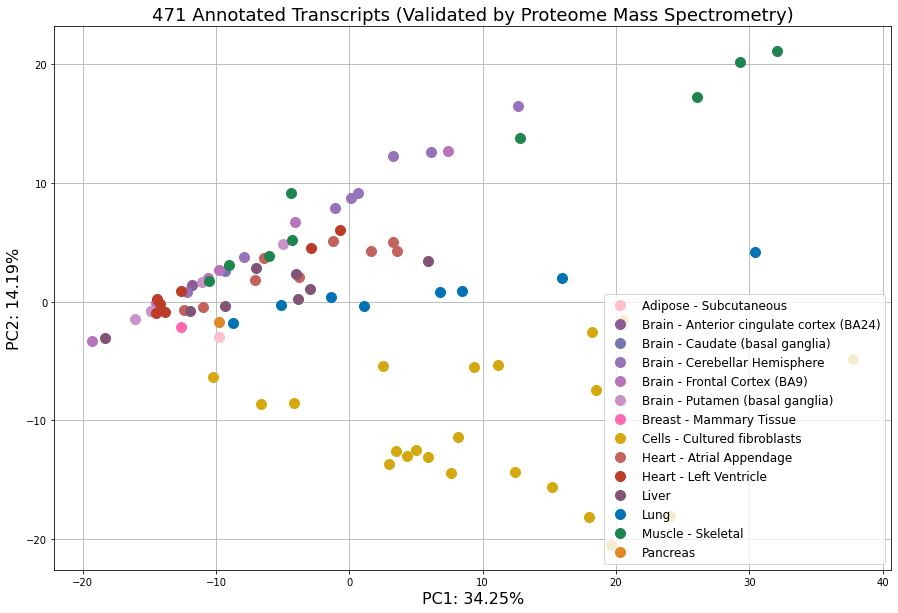

In [93]:
visualize_PCA(annotated_transcript_express_tissue_clean,'471 Annotated Transcripts (Validated by Proteome Mass Spectrometry)')

### Section 3: Hierarchial Clustering of Novel Transcript Expression using Euclidean distance

In [97]:
def hierarchial_clustering_heatmap(df):
    '''
    Conduct correlation analysis and hierarchial clustering using Euclidean distance on the input dataframe.
    Generate a heatmap of Spearman correlation and dendrogram of hierarchial clustering.
    
    Inputs: 
        df: cleaned table of annotated/novel transcript quantification data with tissue type labels
    '''
    # remove sample id information
    df_hc = df.iloc[: , 1:]
    # transpose the dataframe
    df_hc = df_hc.transpose()
    # replace the header with the first row
    df_hc_header = df_hc.iloc[0] #grab the first row for the header
    df_hc= df_hc[1:] #remove first row from dataset
    df_hc.columns = df_hc_header #set the new header row
    # change data type from object to numeric
    df_hc = df_hc.astype('float')
    # calculate pairwise Spearman correlation between columns (tissue types)
    df_corr = df_hc.corr(method="spearman")
    # add color labels corresponding to different tissue types
    df_col_colors = df_corr.columns.map(color_dict)
    # create custom linkage using Eculidean distance metric
    df_linkage = hc.linkage(sp.distance.pdist(df_corr, metric='euclidean'), method='average')

    # create clustermap
    map_hc = sns.clustermap(df_corr, row_linkage=df_linkage, col_linkage=df_linkage, row_colors=df_col_colors,
                          col_colors=df_col_colors,cmap='BrBG',vmin=0,vmax=1,
                          yticklabels=False,xticklabels=False)
    # adjust axes label parameters
    map_ax = map_hc.ax_heatmap
    map_hc.ax_row_dendrogram.set_visible(False)
    # turn off x,y labels
    map_ax.set_ylabel('')    
    map_ax.set_xlabel('')
    # set colorbar position
    map_hc.cax.set_position([1, .15, .03, .6])
    # add legend for color labels (representing different tissue types)
    handles = [Patch(facecolor=color_dict[tissue_name]) for tissue_name in color_dict]
    plt.legend(handles, color_dict, title='Tissues',ncol=3, bbox_to_anchor=(0.5, 1.65), loc="best")
    
    # export figures
    plt.savefig('flair_heatmap_novel_raw_counts.png',facecolor='w')
    # plt.savefig('flair_heatmap_annotated_raw_counts.png',facecolor='w')

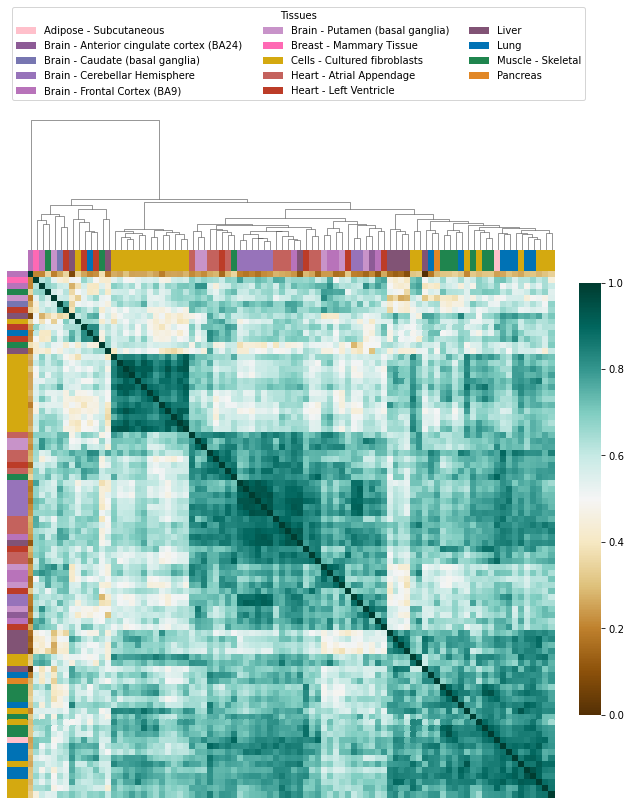

In [98]:
hierarchial_clustering_heatmap(novel_transcript_express_tissue_clean)

### Section 4: Hierarchial Clustering of Annotated Transcript Expression using Euclidean distance

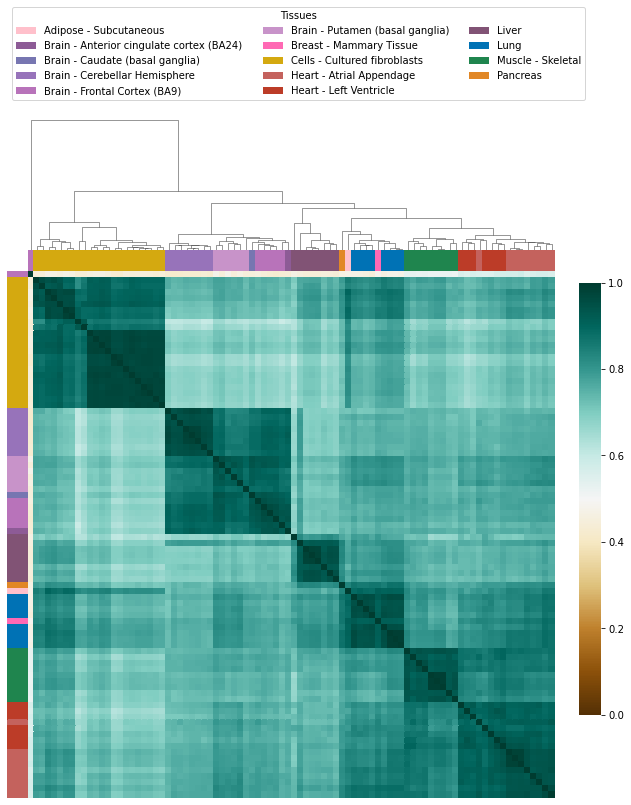

In [95]:
hierarchial_clustering_heatmap(annotated_transcript_express_tissue_clean)